In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import data_clean_utils
from matplotlib.gridspec import GridSpec
from scipy.stats import chi2_contingency,f_oneway,jarque_bera, probplot
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os

In [14]:
# load the dataset

data = pd.read_csv(r'D:\Campus X\projects\swiggy-delivery-time-prediction\data\raw\swiggy.csv')


data.sample(20)
# print("ok")

ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
9148   0x3b2f     PUNERES04DEL01                   30                     4.9   
15035   0xe47      MYSRES17DEL03                   38                     4.8   
26399  0x5b39   COIMBRES010DEL01                   37                     4.9   
7591   0x2e5b     PUNERES18DEL01                   29                     4.8   
15089  0x48f5      SURRES06DEL01                   36                     4.3   
20007  0xb63a      HYDRES05DEL02                   34                       5   
43056  0xb860     INDORES12DEL02                   29                     4.4   
11100  0x47ea     PUNERES03DEL02                   32                     4.8   
5693   0x4c68      SURRES06DEL02                   33                     4.6   
28958  0x541c     CHENRES04DEL02                   29                     4.9   
10525  0x7d66      SURRES07DEL03                   31                     4.6   
3780   0x6ef3   RANCHIRES14DEL01                   24                     4.5   
35236  0x7f0f     CHENRES11DEL02                   26                     4.9   
7601   0x7b2e      JAPRES17DEL03                   21                       5   
11562  0xb864      MYSRES09DEL01                   21                       5   
4540   0x3214     BANGRES07DEL02                   38                     4.6   
28581  0x8b29      MUMRES11DEL03                   32                     4.6   
21540  0x1bca      SURRES09DEL02                   27                     4.7   
44074  0xc472     AURGRES01DEL01                   39                     4.8   
11279  0x2c42     PUNERES15DEL01                   22                     4.3   

       Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
9148             18.514210             73.838429                   18.584210   
15035            12.326356             76.619103                   12.386356   
26399            11.003008             76.975440                   11.013008   
7591             18.593481             73.785901                   18.703481   
15089            21.185047             72.808590                   21.195047   
20007            17.433809             78.386744                   17.483809   
43056            22.748060             75.893400                   22.878060   
11100            18.554382             73.798206                   18.684382   
5693             21.185047             72.808590                   21.205047   
28958            13.029780             80.208812                   13.049780   
10525            21.170798             72.790489                   21.230798   
3780              0.000000              0.000000                    0.110000   
35236            13.064181             80.236442                   13.114181   
7601             26.892312             75.806896                   26.982312   
11562            12.323194             76.630583                   12.433194   
4540             12.978453             77.643685                   12.998453   
28581            18.994237             72.825553                   19.084237   
21540            21.175975             72.795503                   21.225975   
44074            19.876219             75.346017                   19.886219   
11279            18.636215             73.751081                   18.706215   

       Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked  \
9148                     73.908429  10-03-2022    22:40:00          22:50:00   
15035                    76.679103  13-03-2022    17:40:00          17:45:00   
26399                    76.985440  01-03-2022    10:30:00          10:45:00   
7591                     73.895901  14-03-2022    21:15:00          21:30:00   
15089                    72.818590  03-03-2022    09:15:00          09:20:00   
20007                    78.436744  05-04-2022    17:25:00          17:40:00   
43056                    76.023400  18-03-2022    19:25:00          1

In [15]:
data.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

In [16]:
data_clean_utils.perform_data_cleaning(data)

In [17]:
cleaned_data=pd.read_csv("swiggy_cleaned.csv")
cleaned_data

rider_id   age  ratings  restaurant_latitude  \
0        INDORES13DEL02   37.0      4.9            22.745049   
1        BANGRES18DEL02   34.0      4.5            12.913041   
2        BANGRES19DEL01   23.0      4.4            12.914264   
3       COIMBRES13DEL02   38.0      4.7            11.003669   
4        CHENRES12DEL01   32.0      4.6            12.972793   
...                  ...   ...      ...                  ...   
45497     JAPRES04DEL01   30.0      4.8            26.902328   
45498     AGRRES16DEL01   21.0      4.6                  NaN   
45499    CHENRES08DEL03   30.0      4.9            13.022394   
45500   COIMBRES11DEL01   20.0      4.7            11.001753   
45501  RANCHIRES09DEL02   23.0      4.9            23.351058   

       restaurant_longitude  delivery_latitude  delivery_longitude  \
0                 75.892471          22.765049           75.912471   
1                 77.683237          13.043041           77.813237   
2                 77.678400          12.924264           77.688400   
3                 76.976494          11.053669           77.026494   
4                 80.249982          13.012793           80.289982   
...                     ...                ...                 ...   
45497             75.794257          26.912328           75.804257   
45498                   NaN                NaN                 NaN   
45499             80.242439          13.052394           80.272439   
45500             76.986241          11.041753           77.026241   
45501             85.325731          23.431058           85.405731   

       order_date     weather traffic  ...  city_name order_day order_month  \
0      2022-03-19       sunny    high  ...       INDO        19           3   
1      2022-03-25      stormy     jam  ...       BANG        25           3   
2      2022-03-19  sandstorms     low  ...       BANG        19           3   
3      2022-04-05       sunny  medium  ...      COIMB         5           4   
4      2022-03-26      cloudy    high  ...       CHEN        26           3   
...           ...         ...     ...  ...        ...       ...         ...   
45497  2022-03-24       windy    high  ...        JAP        24           3   
45498  2022-02-16       windy     jam  ...        AGR        16           2   
45499  2022-03-11      cloudy     low  ...       CHEN        11           3   
45500  2022-03-07      cloudy    high  ...      COIMB         7           3   
45501  2022-03-02         fog  medium  ...     RANCHI         2           3   

       order_day_of_week is_weekend pickup_time_minutes  order_time_hour  \
0               saturday          1                15.0             11.0   
1                 friday          0                 5.0             19.0   
2               saturday          1                15.0              8.0   
3                tuesday          0                10.0             18.0   
4               saturday          1                15.0             13.0   
...                  ...        ...                 ...              ...   
45497           thursday          0                10.0             11.0   
45498          wednesday          0                15.0             19.0   
45499             friday          0                15.0             23.0   
45500             monday          0                 5.0             13.0   
45501          wednesday          0                 5.0             17.0   

      order_time_of_day   distance  distance_type  
0               morning   3.025149          short  
1               evening  20.183530      very_long  
2               morning   1.552758          short  
3               evening   7.790401         medium  
4             afternoon   6.210138         medium  
...                 ...        ...            ...  
45497           morning   1.489846          short  
45498           evening        NaN            NaN  
45499             night   4.657195          short  
45500         afternoon 

# preliminary Analysis


In [18]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45502 entries, 0 to 45501
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rider_id              45502 non-null  object 
 1   age                   43648 non-null  float64
 2   ratings               43594 non-null  float64
 3   restaurant_latitude   41872 non-null  float64
 4   restaurant_longitude  41872 non-null  float64
 5   delivery_latitude     41872 non-null  float64
 6   delivery_longitude    41872 non-null  float64
 7   order_date            45502 non-null  object 
 8   weather               44977 non-null  object 
 9   traffic               44992 non-null  object 
 10  vehicle_condition     45502 non-null  int64  
 11  type_of_order         45502 non-null  object 
 12  type_of_vehicle       45502 non-null  object 
 13  multiple_deliveries   44509 non-null  float64
 14  festival              45274 non-null  object 
 15  city_type          

In [19]:

categorical_col=cleaned_data.dtypes[cleaned_data.dtypes==object].index.to_list()

numeric_columns = cleaned_data.select_dtypes(include=['float64', 'int64']).columns.to_list()
print(f"Total number of categorical columns: {len(categorical_col)} and numerical columns: {len(numeric_columns)}")


Total number of categorical columns: 12 and numerical columns: 15


In [20]:
# missing values analysis
cleaned_data.isnull().sum()

rider_id                   0
age                     1854
ratings                 1908
restaurant_latitude     3630
restaurant_longitude    3630
delivery_latitude       3630
delivery_longitude      3630
order_date                 0
weather                  525
traffic                  510
vehicle_condition          0
type_of_order              0
type_of_vehicle            0
multiple_deliveries      993
festival                 228
city_type               1198
time_taken                 0
city_name                  0
order_day                  0
order_month                0
order_day_of_week          0
is_weekend                 0
pickup_time_minutes     1640
order_time_hour         1640
order_time_of_day       2070
distance                3630
distance_type           3630
dtype: int64

In [21]:
cleaned_data[numeric_columns].describe().T

count       mean       std        min        25%  \
age                   43648.0  29.555008  5.761482  20.000000  25.000000   
ratings               43594.0   4.635287  0.313827   2.500000   4.500000   
restaurant_latitude   41872.0  18.913696  5.467265   9.957144  12.986047   
restaurant_longitude  41872.0  76.921664  3.503107  72.768726  73.897902   
delivery_latitude     41872.0  18.977356  5.469056   9.967144  13.065996   
delivery_longitude    41872.0  76.985325  3.503260  72.778726  73.940327   
vehicle_condition     45502.0   1.019406  0.835229   0.000000   0.000000   
multiple_deliveries   44509.0   0.744928  0.572488   0.000000   0.000000   
time_taken            45502.0  26.297591  9.386419  10.000000  19.000000   
order_day             45502.0  13.811657  8.709540   1.000000   6.000000   
order_month           45502.0   2.980726  0.546031   2.000000   3.000000   
is_weekend            45502.0   0.274867  0.446452   0.000000   0.000000   
pickup_time_minutes   43862.0   9.989399  4.087516   5.000000   5.000000   
order_time_hour       43862.0  17.423966  4.817856   0.000000  15.000000   
distance              41872.0   9.719296  5.602890   1.465067   4.657655   

                            50%        75%        max  
age                   30.000000  35.000000  39.000000  
ratings                4.700000   4.900000   5.000000  
restaurant_latitude   19.065838  22.751234  30.914057  
restaurant_longitude  76.618203  78.368855  88.433452  
delivery_latitude     19.124049  22.820040  31.054057  
delivery_longitude    76.662620  78.405467  88.563452  
vehicle_condition      1.000000   2.000000   3.000000  
multiple_deliveries    1.000000   1.000000   3.000000  
time_taken            26.000000  32.000000  54.000000  
order_day             13.000000  20.000000  31.000000  
order_month            3.000000   3.000000   4.000000  
is_weekend             0.000000   1.000000   1.000000  
pickup_time_minutes   10.000000  15.000000  15.000000  
order_time_hour       19.000000  21.000000  23.000000  
distance               9.193014  13.680920  20.969489

In [22]:
cleaned_data[categorical_col].describe(include=object)


rider_id  order_date weather traffic type_of_order  \
count             45502       45502   44977   44992         45502   
unique             1320          44       6       4             4   
top     PUNERES01DEL01   2022-03-15     fog     low         snack   
freq                 67        1190    7654   15477         11512   

       type_of_vehicle festival      city_type city_name order_day_of_week  \
count            45502    45274          44304     45502             45502   
unique               4        2              3        22                 7   
top         motorcycle       no  metropolitian       JAP         wednesday   
freq             26427    44380          34029      3439              7077   

       order_time_of_day distance_type  
count              43432         41872  
unique                 4             4  
top                night        medium  
freq               13773         11288

In [23]:
def numerical_analysis(dataframe, column_name, cat_col=None, bins="auto"):
    # create the figure
    fig = plt.figure(figsize=(15,10))
    # generate the layout
    grid = GridSpec(nrows=2, ncols=2, figure=fig)
    # set subplots
    ax1 = fig.add_subplot(grid[0, 0])
    ax2 = fig.add_subplot(grid[0, 1])
    ax3 = fig.add_subplot(grid[1, :])
    # plot the kdeplot
    sns.kdeplot(data=dataframe, x=column_name,hue=cat_col, ax=ax1)
    # plot the boxplot
    sns.boxplot(data=dataframe, x=column_name,hue=cat_col, ax=ax2)
    # plot the histogram
    sns.histplot(data=dataframe, x=column_name,bins=bins,hue=cat_col,kde=True, ax=ax3)
    plt.tight_layout()
    plt.show()


def numerical_categorical_analysis(dataframe, cat_column_1, num_column):
    fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(15,7.5))
    # plot the barplot
    sns.barplot(data=dataframe, x=cat_column_1, y=num_column, ax=ax1[0])
    # plot the boxplot
    sns.boxplot(data=dataframe, x=cat_column_1, y=num_column, ax=ax1[1])
    # plot violin plot
    sns.violinplot(data=dataframe, x=cat_column_1, y=num_column, ax=ax2[0])
    # plot strip plot
    sns.stripplot(data=dataframe, x=cat_column_1, y=num_column, ax=ax2[1])
    plt.tight_layout()
    plt.show()


def categorical_analysis(dataframe, column_name):
    # print the values counts of categories
    display(
        pd.DataFrame({
            "Count": (
                dataframe[column_name]
                .value_counts()),
            "Percentage": (
                dataframe[column_name]
                .value_counts(normalize=True)
                .mul(100)
                .round(2)
                .astype("str")
                .add("%")
                )
        })
    )
    print("*" * 50)
    # get unique categories
    unique_categories = dataframe[column_name].unique().tolist()
    number_of_categories = dataframe[column_name].nunique()
    print(f"The unique categories in {column_name} column are {unique_categories}")
    print("*" * 50)
    print(f"The number of categories in {column_name} column are {number_of_categories}")
    # plot countplot
    sns.countplot(data=dataframe, x=column_name)
    plt.xticks(rotation=45)
    plt.show()


def multivariate_analysis(dataframe, num_column, cat_column_1, cat_column_2):
    fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(15,7.5))
    # plot the barplot
    sns.barplot(data=dataframe, x=cat_column_1,
                y=num_column,hue=cat_column_2, ax=ax1[0])
    # plot the boxplot
    sns.boxplot(data=dataframe, x=cat_column_1,
                y=num_column,hue=cat_column_2, ax=ax1[1])
    # plot violin plot
    sns.violinplot(data=dataframe, x=cat_column_1, gap=0.1,
                   y=num_column,hue=cat_column_2, ax=ax2[0])
    # plot strip plot
    sns.stripplot(data=dataframe, x=cat_column_1,
                  y=num_column,hue=cat_column_2,dodge=True,ax=ax2[1])
    plt.tight_layout()
    plt.show()

def chi_2_test(dataframe, col1, col2, alpha= 0.05):
    data = (
        dataframe.loc[:, [col1, col2]]
        .dropna()
    )
    # create contingency table
    contingency_table = pd.crosstab(data[col1], data[col2])
    # perform chi-squared test
    _, p_val, _, _ = chi2_contingency(contingency_table)
    print(p_val)
    if p_val <= alpha:
        print(f"Reject the null hypothesis. There is a significant association between {col1} and {col2}.")
    else:
        print(f"Fail to reject the null hypothesis. There is no significant association between {col1} and {col2}.")

def anova_test(dataframe, num_col, cat_col, alpha=0.05):
    data = (
        dataframe.loc[:, [num_col, cat_col]]
        .dropna()
    )
    cat_group = data.groupby(cat_col)
    groups = [group[num_col].values for _, group in cat_group]
    f_stat, p_val = f_oneway(*groups)
    print(p_val)
    if p_val <= alpha:
        print(f"Reject the null hypothesis. There is a significant relationship between {num_col} and {cat_col}.")
    else:
        print(f"Fail to reject the null hypothesis. There is no significant relationship between {num_col} and {cat_col}.")

def test_for_normality(dataframe, column_name, alpha=0.05):
    data = dataframe[column_name]
    print("Jarque Bera Test for Normality")
    _, p_val = jarque_bera(data)
    print(p_val)
    if p_val <= alpha:
        print(f"Reject the null hypothesis. The data is not normally distributed.")
    else:
        print(f"Fail to reject the null hypothesis. The data is normally distributed.",end="\n\n")

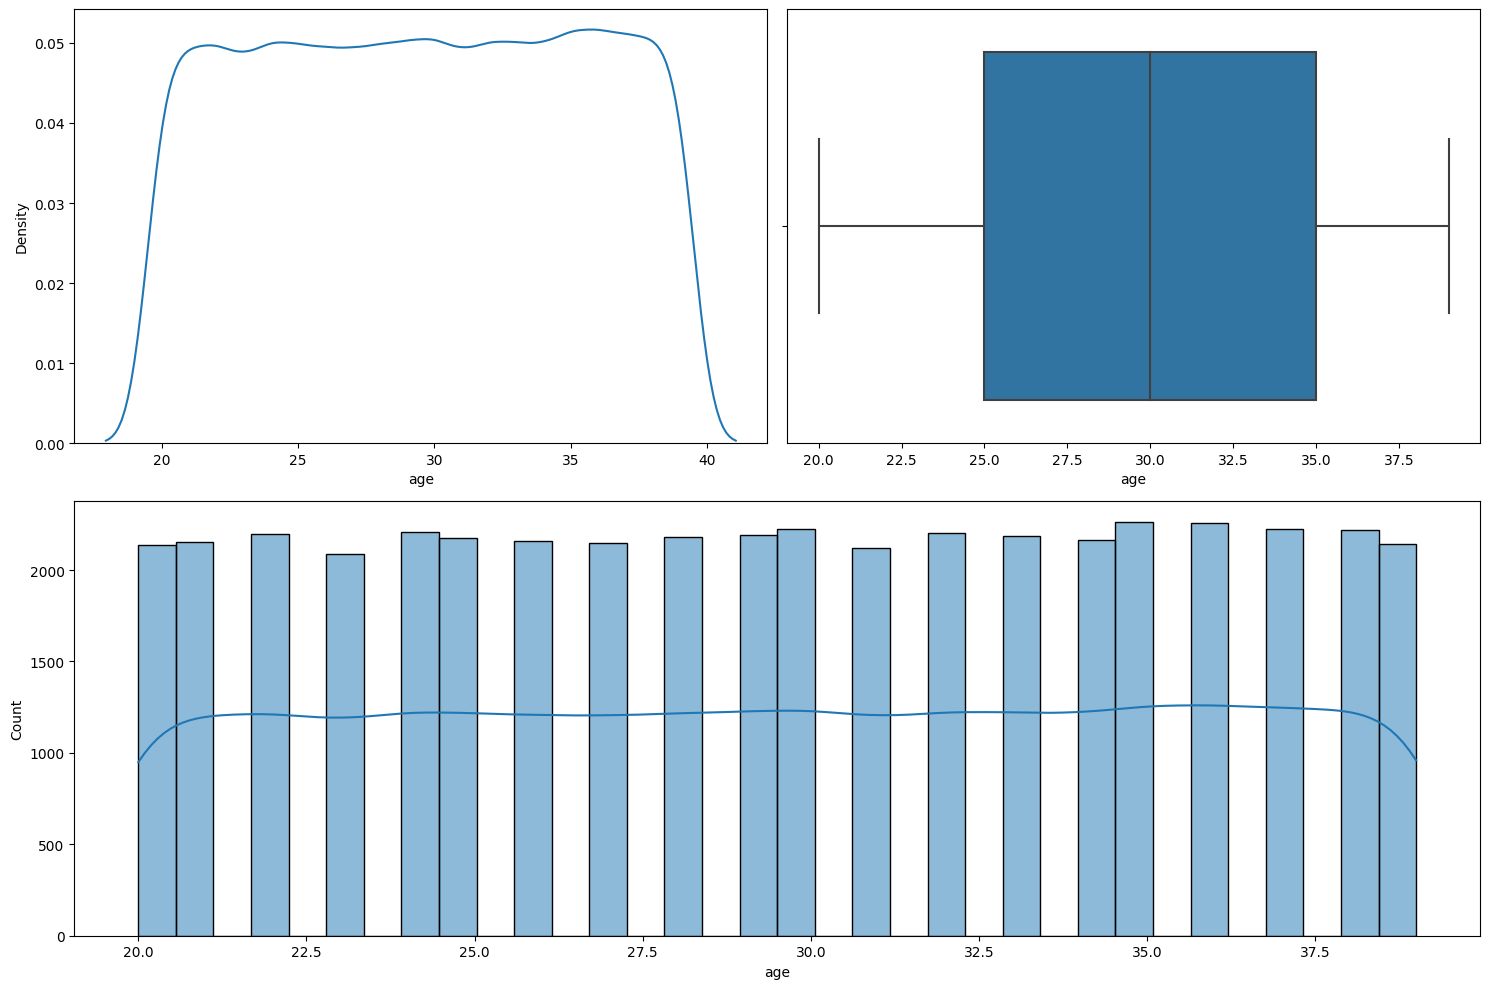

In [25]:
numerical_analysis(dataframe=cleaned_data,column_name="age")

In [303]:
cleaned_data.columns

Index(['rider_id', 'rider_age', 'rider_ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather_conditions', 'road_traffic_density',
       'vehicle_condition', 'type_of_order', 'type_of_vehicle',
       'multiple_deliveries', 'festival', 'city', 'time_taken', 'rider_city',
       'order_day', 'order_month', 'order_year', 'order_day_name',
       'order_weekend', 'pick_up_duration_min', 'distance'],
      dtype='object')

data type of target column is int64


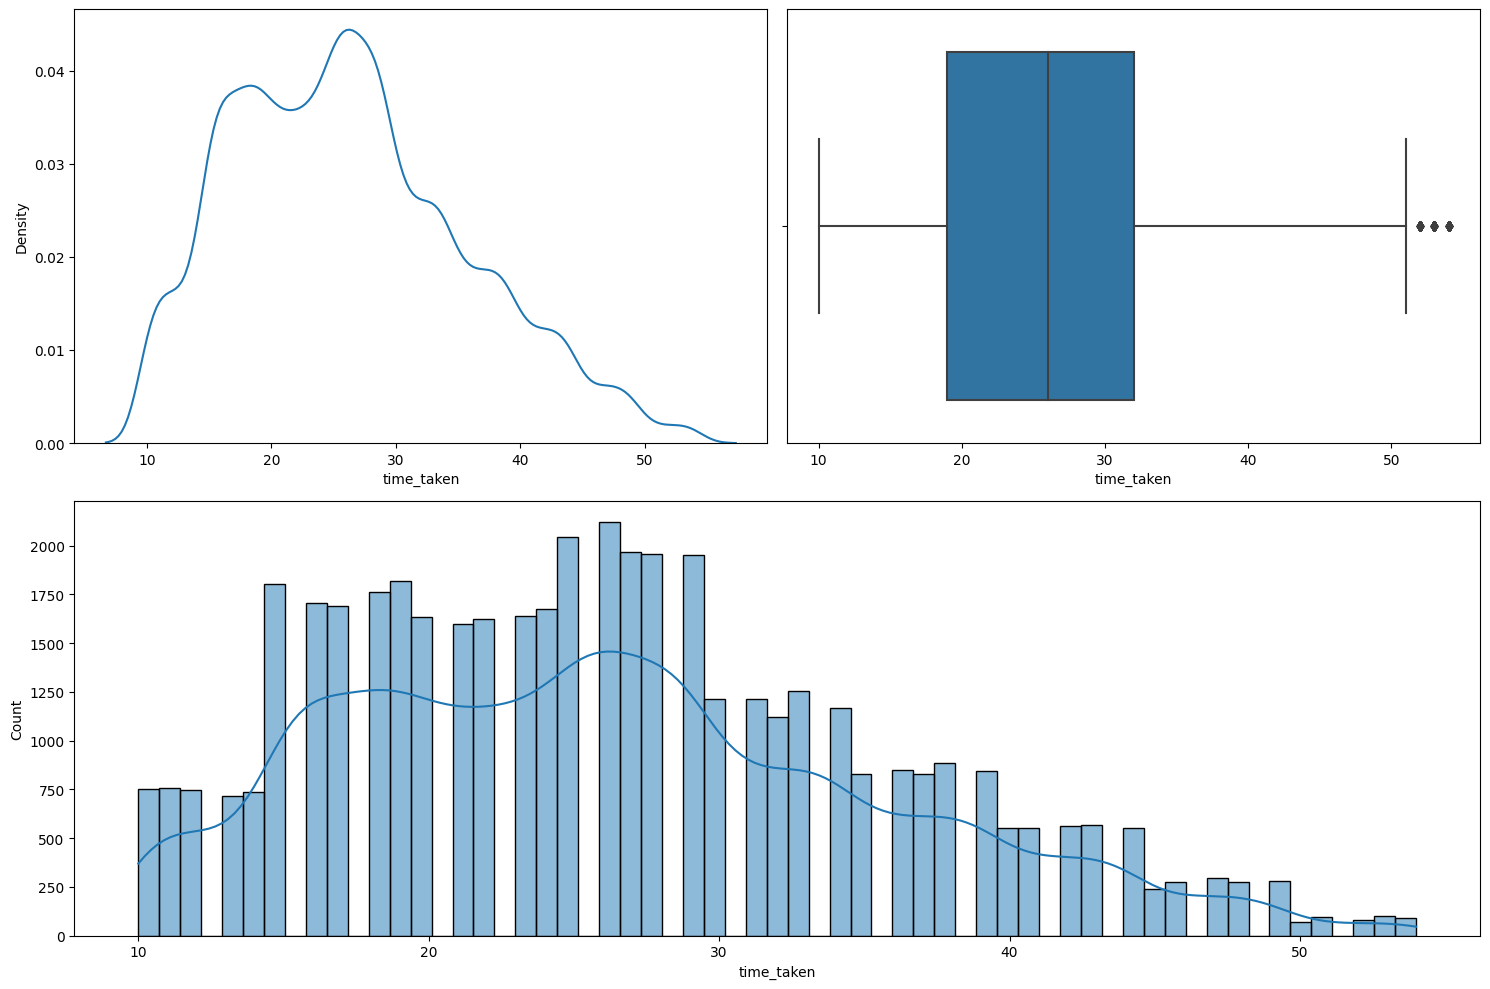

In [26]:
# target column

print(f"data type of target column is {cleaned_data['time_taken'].dtype}")
numerical_analysis(cleaned_data,'time_taken')

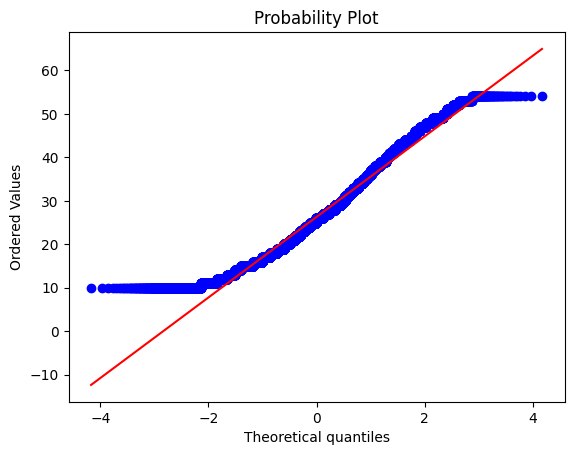

In [305]:
probplot(cleaned_data['time_taken'], plot=plt)
plt.show()

In [306]:
# tests for normailty

test_for_normality(cleaned_data, 'time_taken')

Jarque Bera Test for Normality
0.0
Reject the null hypothesis. The data is not normally distributed.


In [307]:
# check rows where data is acting as an outlier
target_25, target_75=np.percentile(cleaned_data['time_taken'],[25,75])
iqr= target_75-target_25
max=target_75+1.5*iqr
cleaned_data['time_taken'][cleaned_data['time_taken']>max].count()

270

In [308]:
cleaned_data.loc[(cleaned_data['time_taken']>max),"weather_conditions"].value_counts()
# no effects of weather on outlier of target column

weather_conditions
fog           57
sunny         51
cloudy        44
windy         44
stormy        37
sandstorms    32
Name: count, dtype: int64

In [309]:

avg_distance=cleaned_data['distance'].mean()
outlier_target_mean=cleaned_data.loc[(cleaned_data['time_taken']>max),'distance'].mean()
print("Avg distance and outlier target distance means are {:.2f} and {:.2f}".format(avg_distance, outlier_target_mean))


Avg distance and outlier target distance means are 9.73 and 13.32


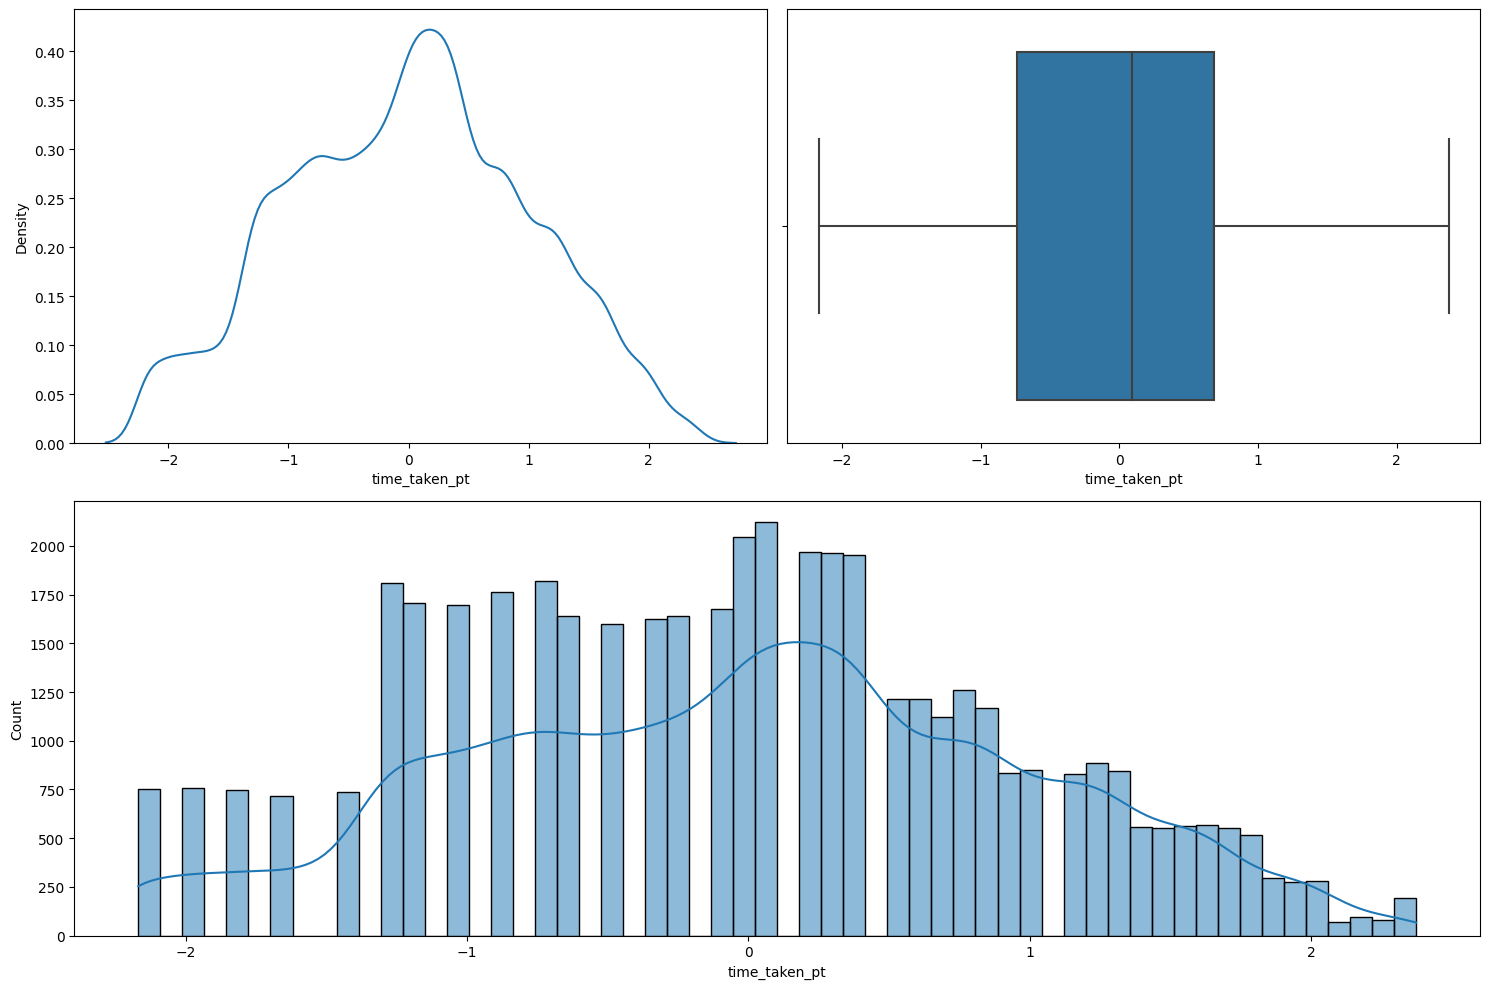

In [310]:
cleaned_data.columns
# apply power transformation method
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')

cleaned_data['time_taken_pt']=pt.fit_transform(cleaned_data[['time_taken']])
numerical_analysis(cleaned_data,'time_taken_pt')



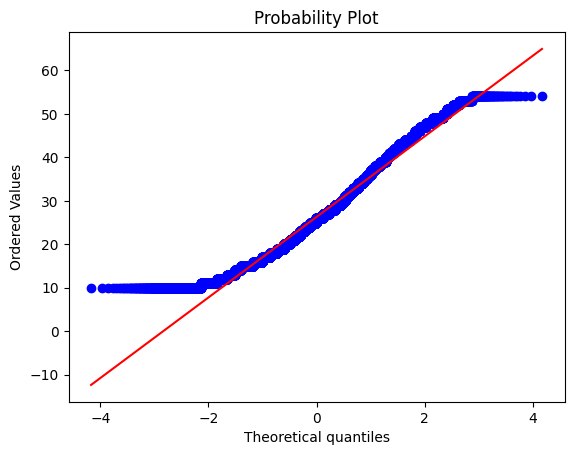

In [311]:
probplot(cleaned_data['time_taken'],plot=plt,)
plt.show()

In [312]:
rider_id_group=cleaned_data[['rider_id', 'rider_age', 'rider_ratings']].groupby('rider_id')

# print(rider_id_group.head(5).sort_values('rider_id'))

type(rider_id_group)
cleaned_data[['rider_id', 'rider_age', 'rider_ratings']].duplicated(keep=False).sum()



11669

In [313]:
(
    cleaned_data.loc[cleaned_data[['rider_id', 'rider_age', 'rider_ratings']].duplicated(keep=False),['rider_id', 'rider_age', 'rider_ratings']]
    .dropna()
    .sort_values('rider_id')
)

rider_id  rider_age  rider_ratings
18554  AGRRES03DEL02        24.0            4.9
40333  AGRRES03DEL02        24.0            4.9
28507  AGRRES03DEL03        30.0            4.7
26306  AGRRES03DEL03        30.0            4.7
36173  AGRRES06DEL02        36.0            4.9
...               ...        ...            ...
12755  VADRES20DEL02        28.0            4.5
5096   VADRES20DEL03        35.0            4.9
17984  VADRES20DEL03        35.0            4.9
21982  VADRES20DEL03        37.0            4.9
5148   VADRES20DEL03        37.0            4.9

[10155 rows x 3 columns]

# age 

In [314]:
cleaned_data['rider_age'].dtype
cleaned_data['rider_age'].describe().T

count    43701.000000
mean        29.579804
std          5.801789
min         20.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         50.000000
Name: rider_age, dtype: float64

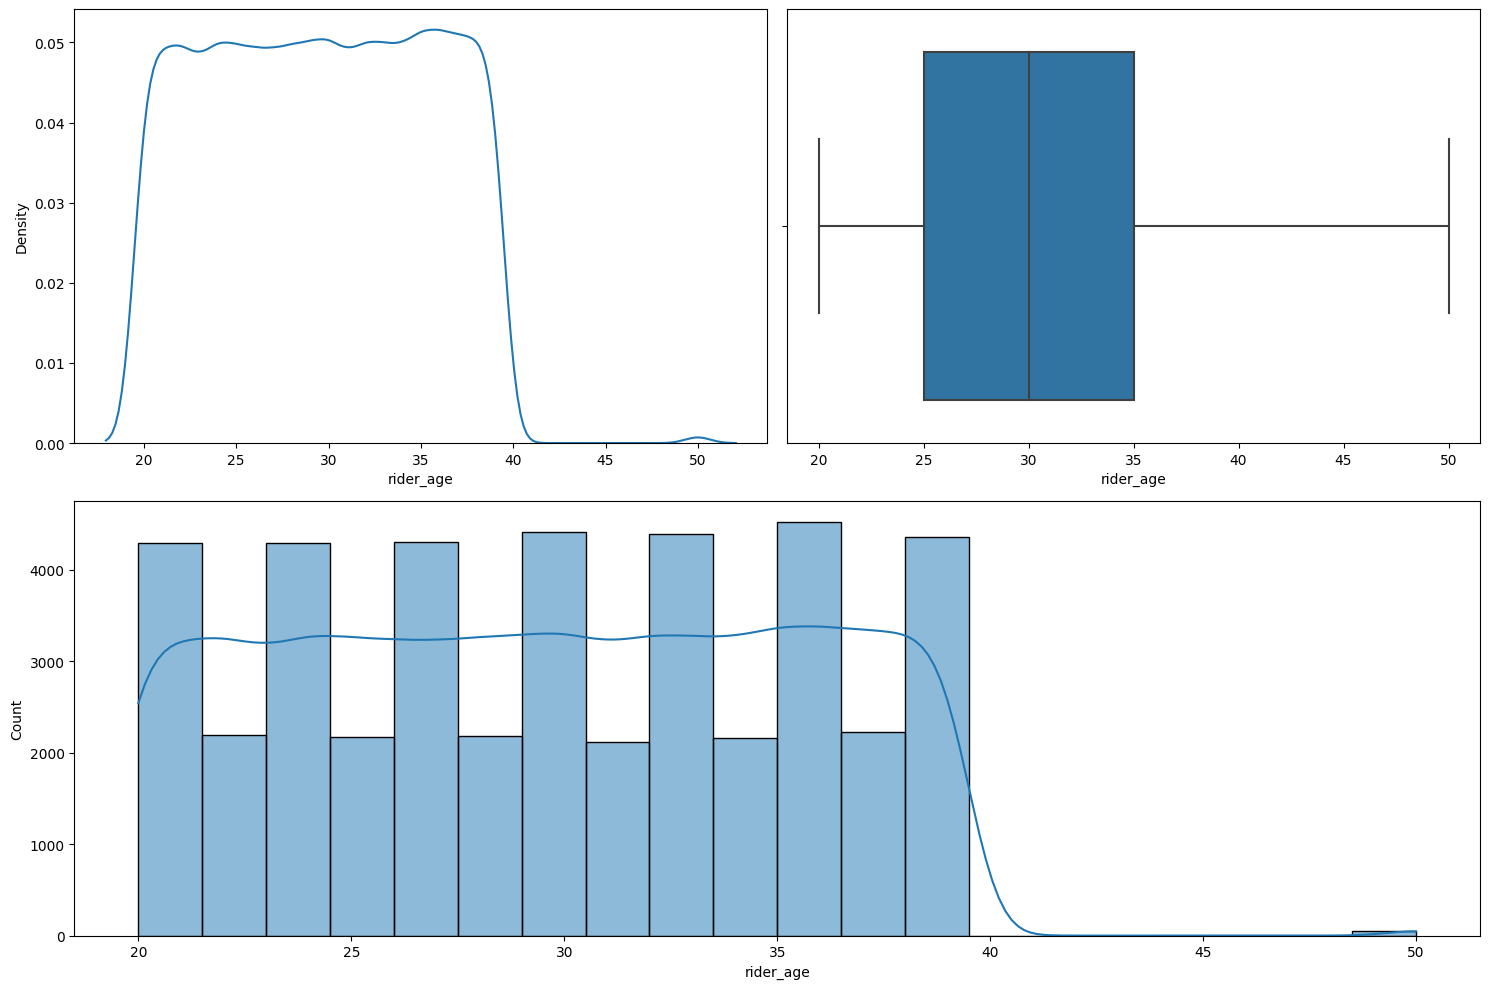

In [315]:
numerical_analysis(cleaned_data,'rider_age',bins=20)

<Axes: xlabel='rider_age', ylabel='time_taken'>

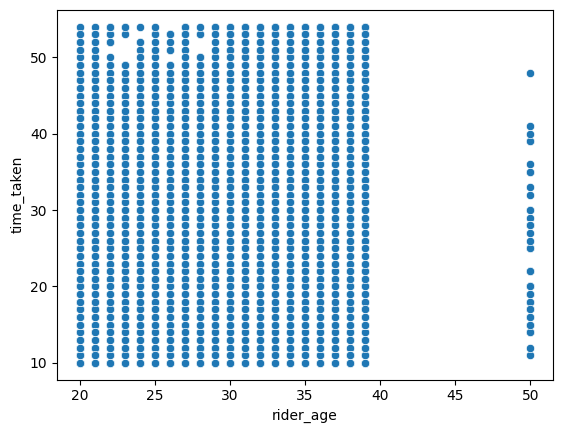

In [316]:
# relationship between target and rider age
sns.scatterplot(data=cleaned_data,x='rider_age',y='time_taken')


The scatter plot shows a concentration of data points for riders aged 20-40, with no clear relationship between age and time taken. There are a few outliers for older riders, which could represent exceptional cases.

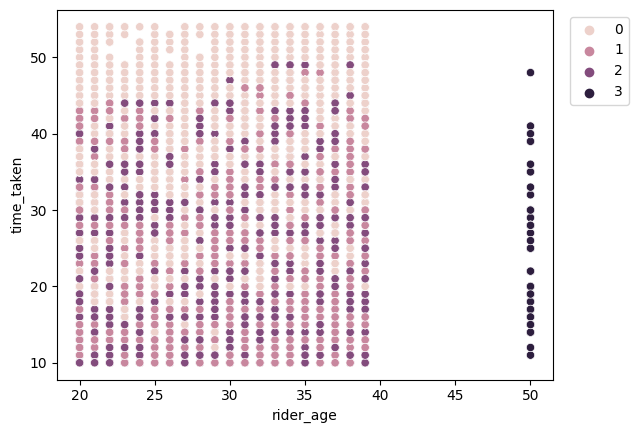

In [317]:
sns.scatterplot(data=cleaned_data,x='rider_age',y='time_taken',hue='vehicle_condition')
plt.legend(bbox_to_anchor=(1.02,1),loc=2)
plt.show()

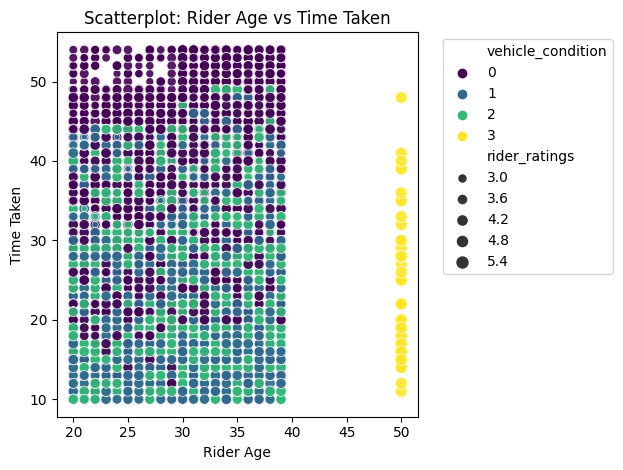

In [318]:

sns.scatterplot(
    data=cleaned_data,
    x='rider_age',
    y='time_taken',
    hue='vehicle_condition',  # Color points based on vehicle condition
    size='rider_ratings',     # Vary size based on rider ratings
    palette='viridis',        # Use a vibrant color palette
    alpha=0.9                 # Make points slightly transparent
)

# Adjust legend for better display
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title("Scatterplot: Rider Age vs Time Taken")
plt.xlabel("Rider Age")
plt.ylabel("Time Taken")
plt.tight_layout()

# Show the plot
plt.show()


<Axes: xlabel='type_of_vehicle', ylabel='rider_age'>

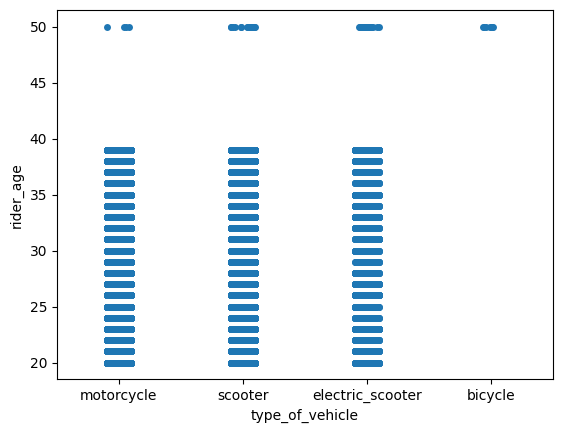

In [319]:
# preference of vehicle type based on age
sns.stripplot(data=cleaned_data,x='type_of_vehicle',y="rider_age")

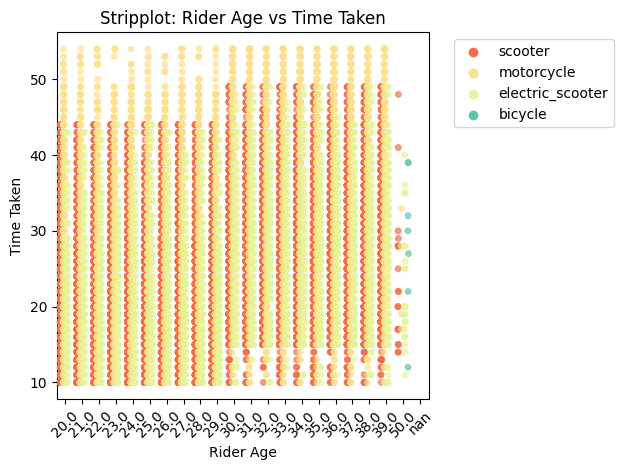

In [320]:
sns.stripplot(
    data=cleaned_data,
    x='rider_age',                 # X-axis variable
    y='time_taken',                # Y-axis variable
    hue='type_of_vehicle',       # Color points based on 'type_of_vehicle'
    size=5,                        # Fixed size of points (or provide a column for dynamic size)
    jitter=True,                   # Add jitter to reduce overlap
    dodge=True,                    # Separate points for different `hue` values
    palette='Spectral',            # Use a color palette
    alpha=0.7                      # Make points semi-transparent
)

# Adjust legend and plot labels
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title("Stripplot: Rider Age vs Time Taken")
plt.xlabel("Rider Age")
plt.ylabel("Time Taken")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# rating


In [321]:
cleaned_data['rider_ratings'].describe().round(2)

count    43647.00
mean         4.64
std          0.32
min          2.50
25%          4.50
50%          4.70
75%          4.90
max          6.00
Name: rider_ratings, dtype: float64

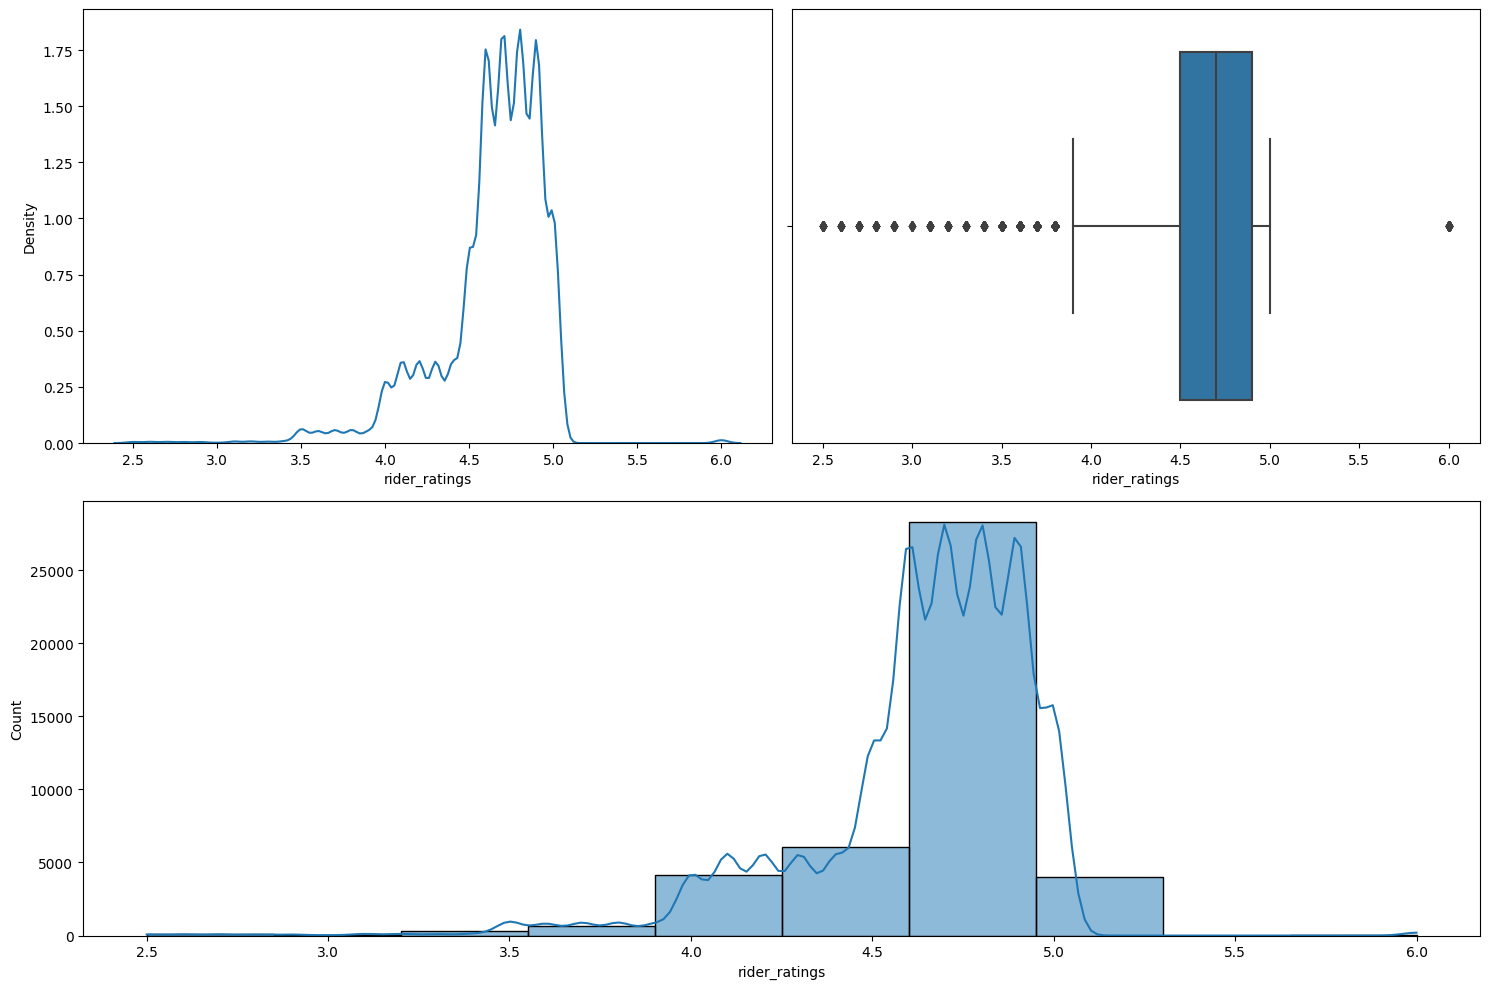

In [322]:
numerical_analysis(cleaned_data,'rider_ratings',bins=10)

<Axes: xlabel='rider_ratings', ylabel='time_taken'>

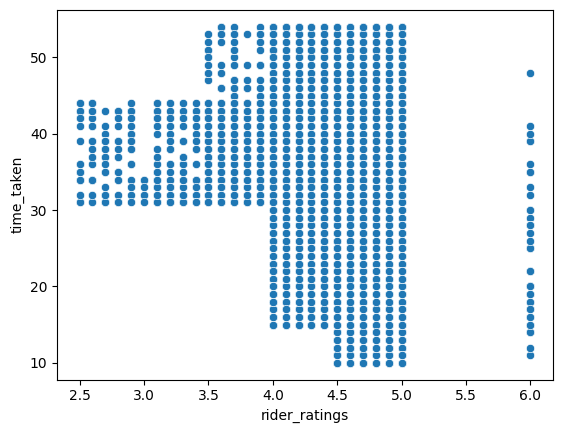

In [323]:
sns.scatterplot(
    cleaned_data,
    x='rider_ratings',
    y='time_taken',
)

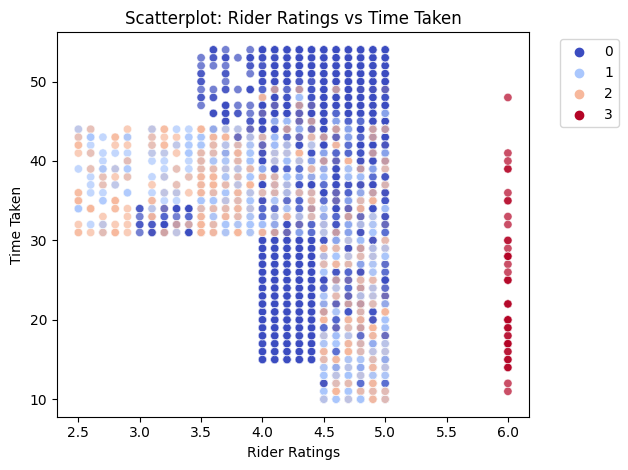

In [324]:
sns.scatterplot(
    data=cleaned_data,                 # Data
    x='rider_ratings',                 # X-axis variable
    y='time_taken',                    # Y-axis variable
    hue='vehicle_condition',           # Color points based on vehicle condition
    palette='coolwarm',                # Color palette
    sizes=(10, 200),                   # Size range of points
    markers=['o', 's', 'D'],           # Markers: 'o' for circle, 's' for square, 'D' for diamond
    alpha=0.7,                         # Semi-transparent points
    legend='full',                     # Full legend
)

# Additional customizations
plt.title("Scatterplot: Rider Ratings vs Time Taken")
plt.xlabel("Rider Ratings")
plt.ylabel("Time Taken")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)  # Place the legend outside the plot

# Show the plot
plt.tight_layout()
plt.show()

Here's a summary of the scatter plot in a few lines:

The scatter plot shows a concentration of riders with high ratings, with no clear relationship between rating and time taken. Vehicle condition appears to have some influence on time taken, with lower condition vehicles potentially associated with longer times. Outliers suggest exceptional cases where highly rated riders took significantly different times.

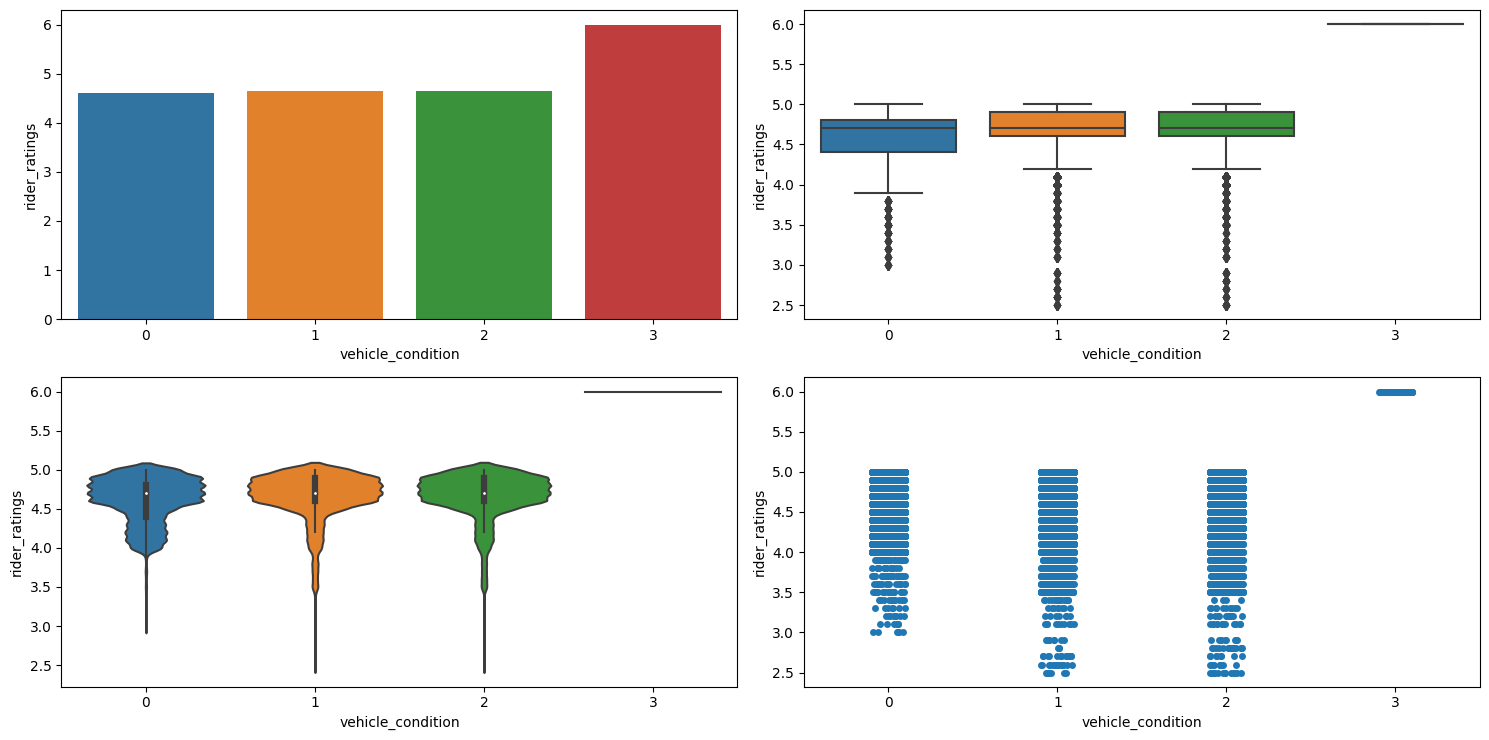

In [325]:
# does ratings get affected by vehicle type

numerical_categorical_analysis(cleaned_data, 'vehicle_condition', 'rider_ratings')

The more worst the vehicle condition is, the more lower the rating gets.
The category 3 has no data means there are NaN values. This simply means that customers avoid rating their riders even rating of 1 when the vehicle condition is bad.

In [326]:
(
    cleaned_data.loc[(cleaned_data['vehicle_condition']==3),'rider_ratings']
    .value_counts()
)

rider_ratings
6.0    53
Name: count, dtype: int64

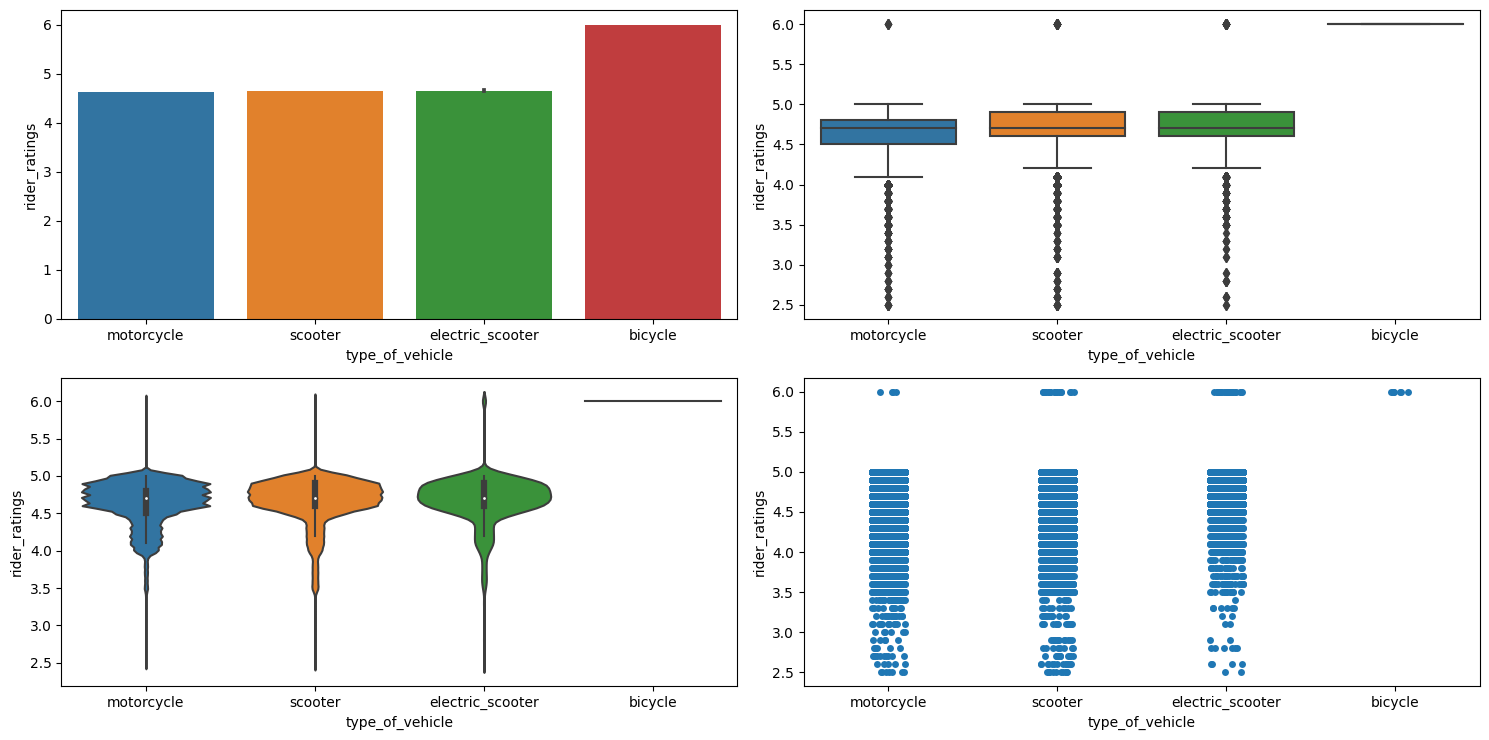

In [327]:
numerical_categorical_analysis(cleaned_data,'type_of_vehicle','rider_ratings')

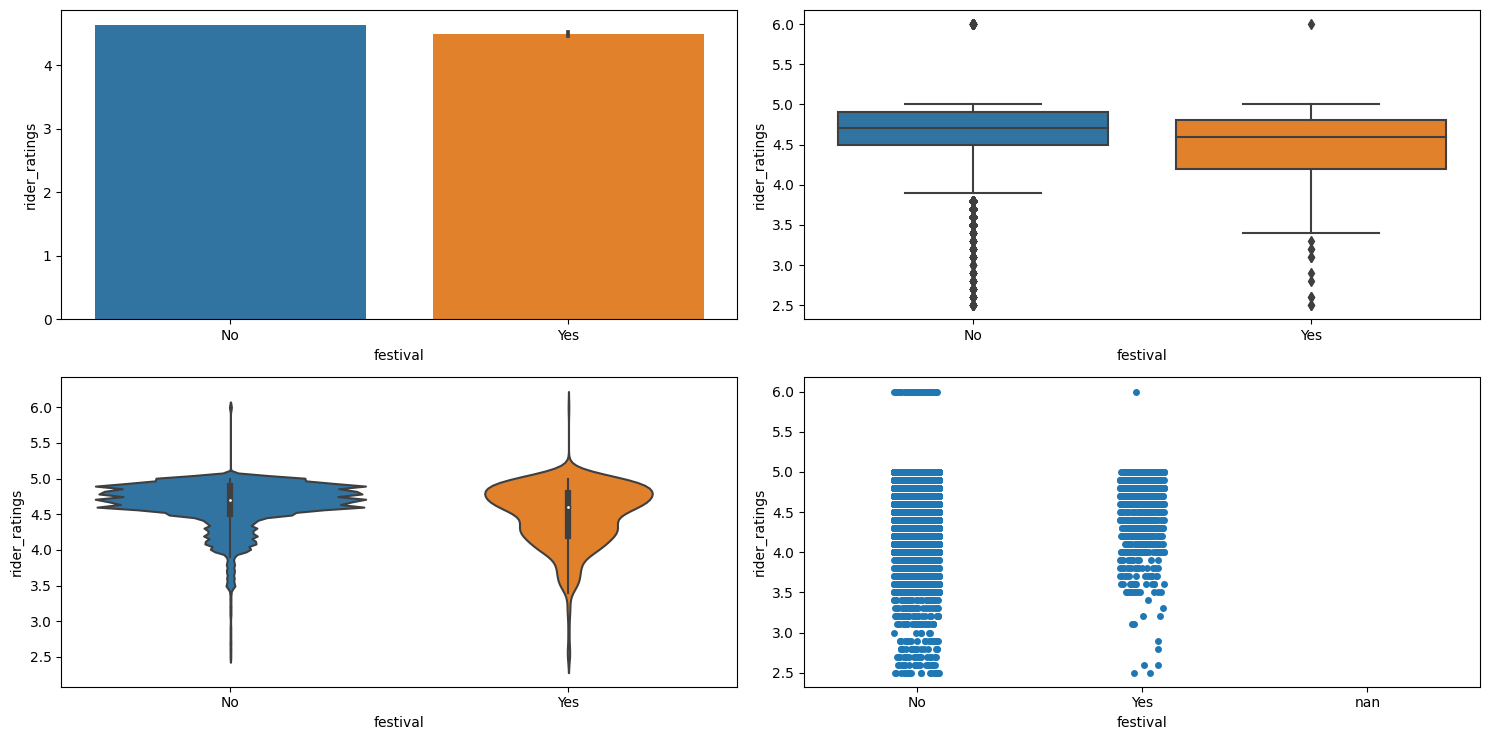

In [328]:
numerical_categorical_analysis(cleaned_data,'festival','rider_ratings')

* Festival Impact: The violin plot suggests that riders who did not participate in a festival tend to have higher median ratings and a distribution skewed towards higher ratings compared to those who participated in a festival.
* Potential Factors: The difference in distributions could be due to various factors such as increased workload during festivals, potential distractions, or different types of tasks assigned during festival periods.
* Festival Impact: The stripplot suggests that there might be a difference in rider ratings between periods with and without festivals. Riders seem to have slightly higher ratings during non-festival times.
* Variability: The wider spread of ratings in the "Yes festival" group indicates greater variability or inconsistency in rider performance during festival periods.

In [329]:
# location subset

location_subset = cleaned_data.loc[:,cleaned_data.columns[3:7].tolist() + ['rider_city']]
import plotly.graph_objects as go
delivery_df = pd.DataFrame({
    'latitude': cleaned_data['delivery_latitude'],
    'longitude': cleaned_data['delivery_longitude'],
    "city_name": cleaned_data['rider_city']
})
fig = go.Figure(go.Scattermapbox(
    lat=delivery_df['latitude'],          # Set the latitude values from the dataframe
    lon=delivery_df['longitude'],         # Set the longitude values from the dataframe
    mode='markers',                       # Markers for scatter plot
    marker=dict(size=10, color='blue'),   # Customize the marker (size and color)
    text=delivery_df['city_name'],        # Text to show on hover (city name)
))

# Update layout with map style and center
fig.update_layout(
    title="Delivery Points",              # Set the title of the map
    mapbox=dict(
        style="carto-positron",           # Set the map style
        center=dict(lat=20.5937, lon=78.9629),  # Center map over India
        zoom=3,                            # Set zoom level
    ),
    showlegend=False                      # Disable the legend
)

# Display the plot
fig.show()


# order Analysis


In [330]:
cleaned_data.filter(like='order').columns
order_data_subset=cleaned_data.loc[:,['order_date', 'order_day', 'order_month',
       'order_day_name', 'order_weekend','festival','time_taken']]
order_data_subset

order_date  order_day  order_month order_day_name  order_weekend  \
0      2022-03-19         19            3       Saturday              1   
1      2022-03-25         25            3         Friday              0   
2      2022-03-19         19            3       Saturday              1   
3      2022-04-05          5            4        Tuesday              0   
4      2022-03-26         26            3       Saturday              1   
...           ...        ...          ...            ...            ...   
45550  2022-03-24         24            3       Thursday              0   
45551  2022-02-16         16            2      Wednesday              0   
45552  2022-03-11         11            3         Friday              0   
45553  2022-03-07          7            3         Monday              0   
45554  2022-03-02          2            3      Wednesday              0   

      festival  time_taken  
0           No          24  
1           No          33  
2           No          26  
3           No          21  
4           No          30  
...        ...         ...  
45550       No          32  
45551       No          36  
45552       No          16  
45553       No          26  
45554       No          36  

[45555 rows x 7 columns]

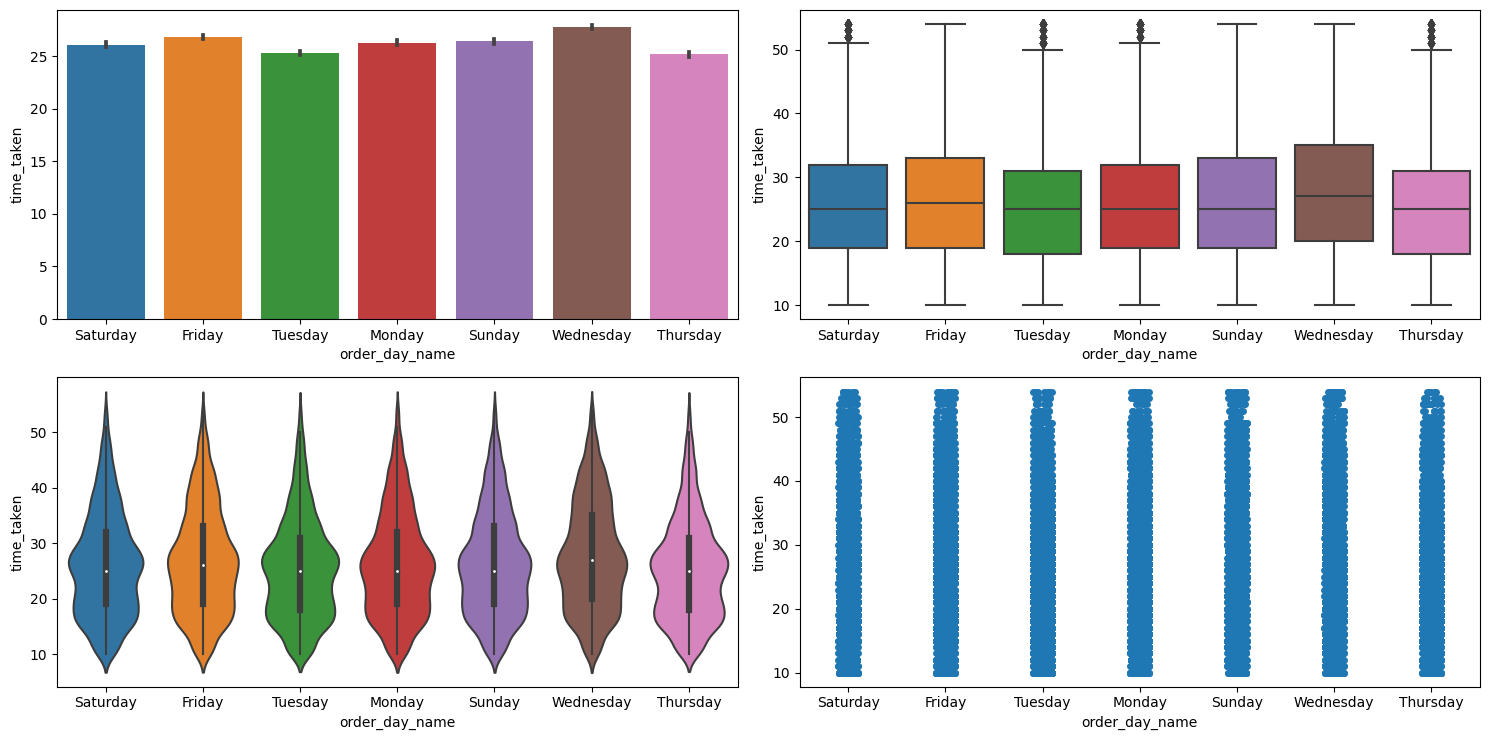

In [331]:
numerical_categorical_analysis(order_data_subset,'order_day_name','time_taken')

* Variability: The violin plot reveals that the variability in time_taken differs across days of the week. Some days (e.g., Saturday and Sunday) show a wider spread of time_taken values, indicating greater variability in the time it takes to complete tasks on those days.
* Median Comparison: By comparing the medians, we can observe that the median time_taken seems to be higher on certain days compared to others. For instance, the median appears to be higher on Wednesday than on other day.
* 

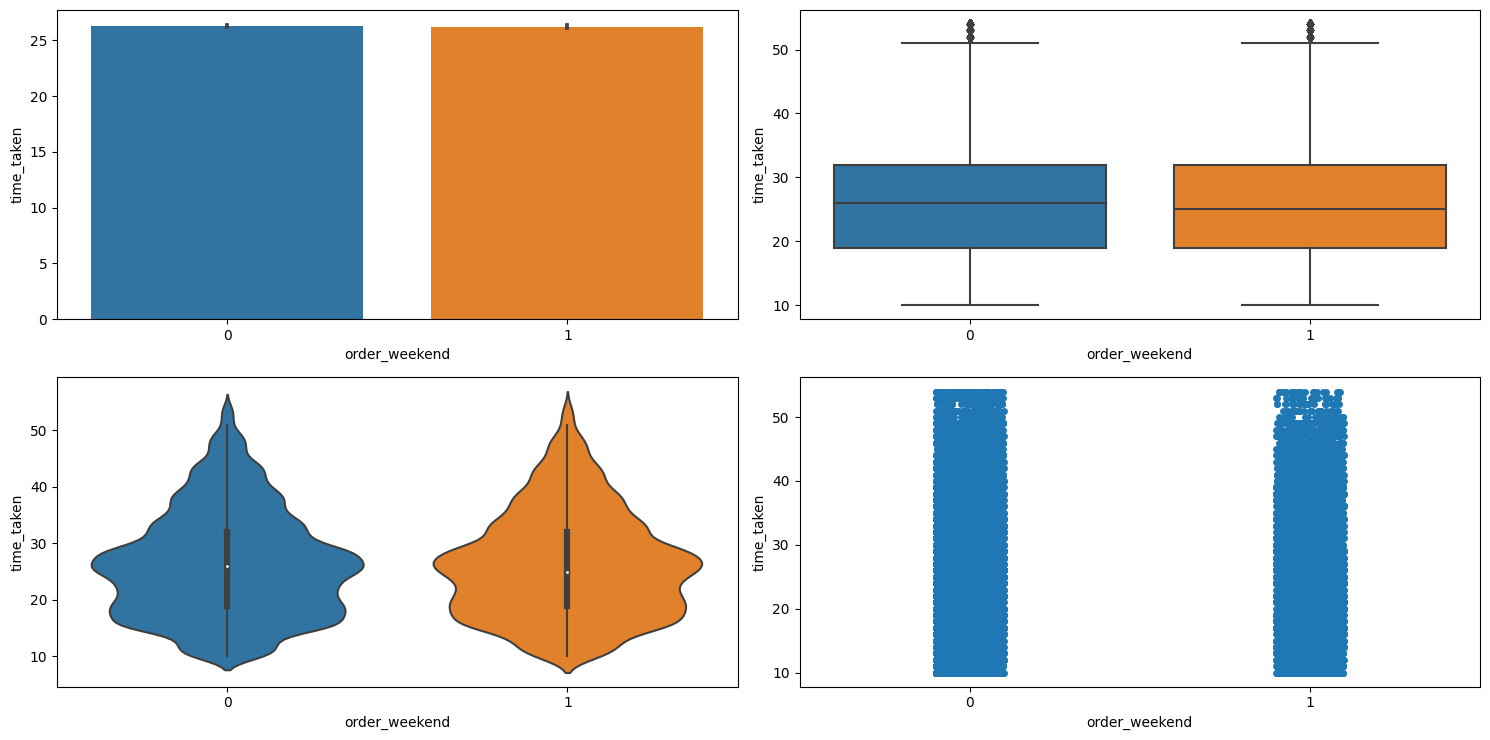

In [332]:
# does having a weekend affects target

numerical_categorical_analysis(order_data_subset, "order_weekend", "time_taken")

In [333]:
# do weekends have an impact on traffic

chi_2_test(order_data_subset, "order_weekend", "time_taken")

0.3381564585511265
Fail to reject the null hypothesis. There is no significant association between order_weekend and time_taken.


In [334]:
order_data_subset

order_date  order_day  order_month order_day_name  order_weekend  \
0      2022-03-19         19            3       Saturday              1   
1      2022-03-25         25            3         Friday              0   
2      2022-03-19         19            3       Saturday              1   
3      2022-04-05          5            4        Tuesday              0   
4      2022-03-26         26            3       Saturday              1   
...           ...        ...          ...            ...            ...   
45550  2022-03-24         24            3       Thursday              0   
45551  2022-02-16         16            2      Wednesday              0   
45552  2022-03-11         11            3         Friday              0   
45553  2022-03-07          7            3         Monday              0   
45554  2022-03-02          2            3      Wednesday              0   

      festival  time_taken  
0           No          24  
1           No          33  
2           No          26  
3           No          21  
4           No          30  
...        ...         ...  
45550       No          32  
45551       No          36  
45552       No          16  
45553       No          26  
45554       No          36  

[45555 rows x 7 columns]

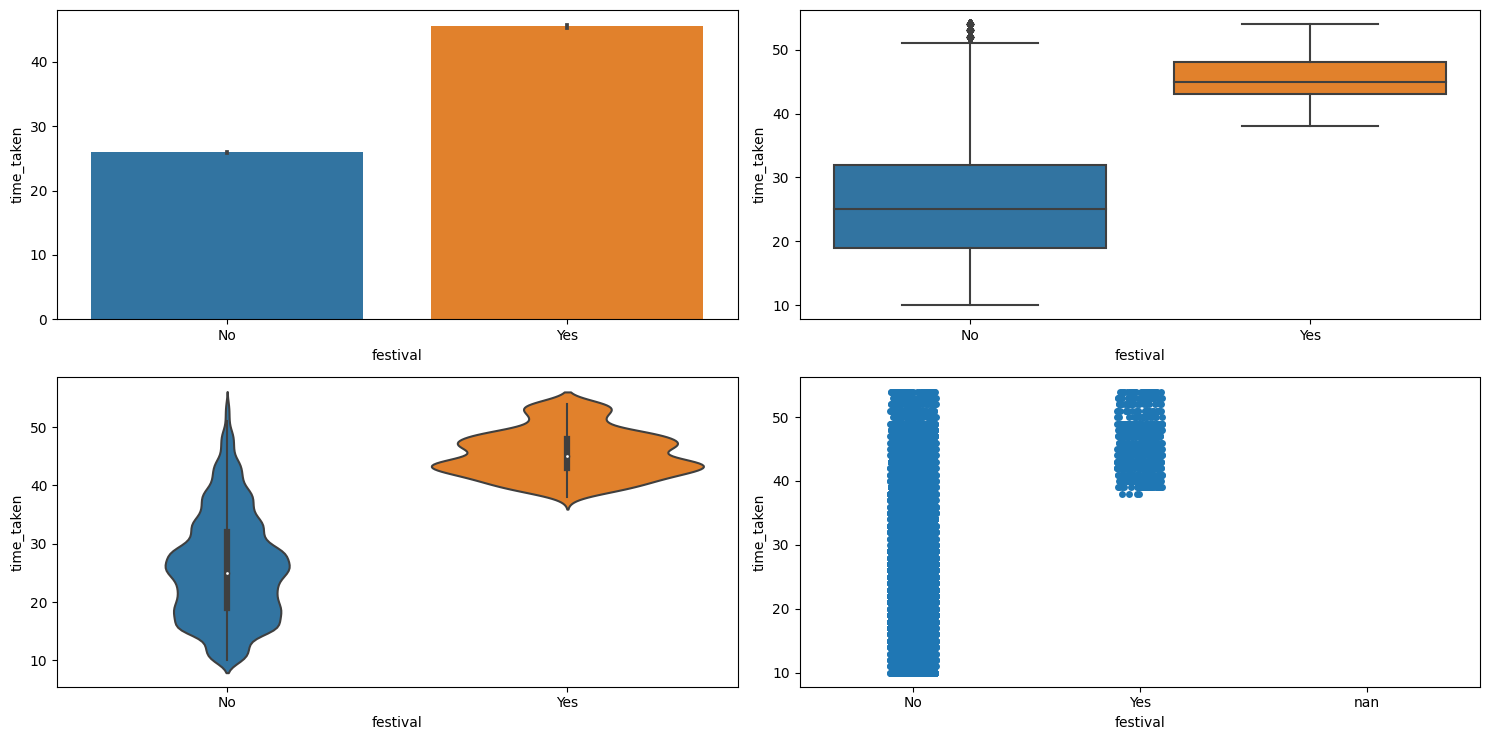

In [335]:
numerical_categorical_analysis(order_data_subset, "festival", "time_taken")

In [336]:
cleaned_data.pivot_table(index="road_traffic_density",columns='festival',values='time_taken',aggfunc="mean")

festival                     No        Yes
road_traffic_density                      
high                  27.010373  45.826087
jam                   30.538039  46.093651
low                   21.284332  42.020000
medium                26.550288  43.715385

In [337]:
chi_2_test(cleaned_data,'festival','road_traffic_density')

1.1223471129146869e-153
Reject the null hypothesis. There is a significant association between festival and road_traffic_density.


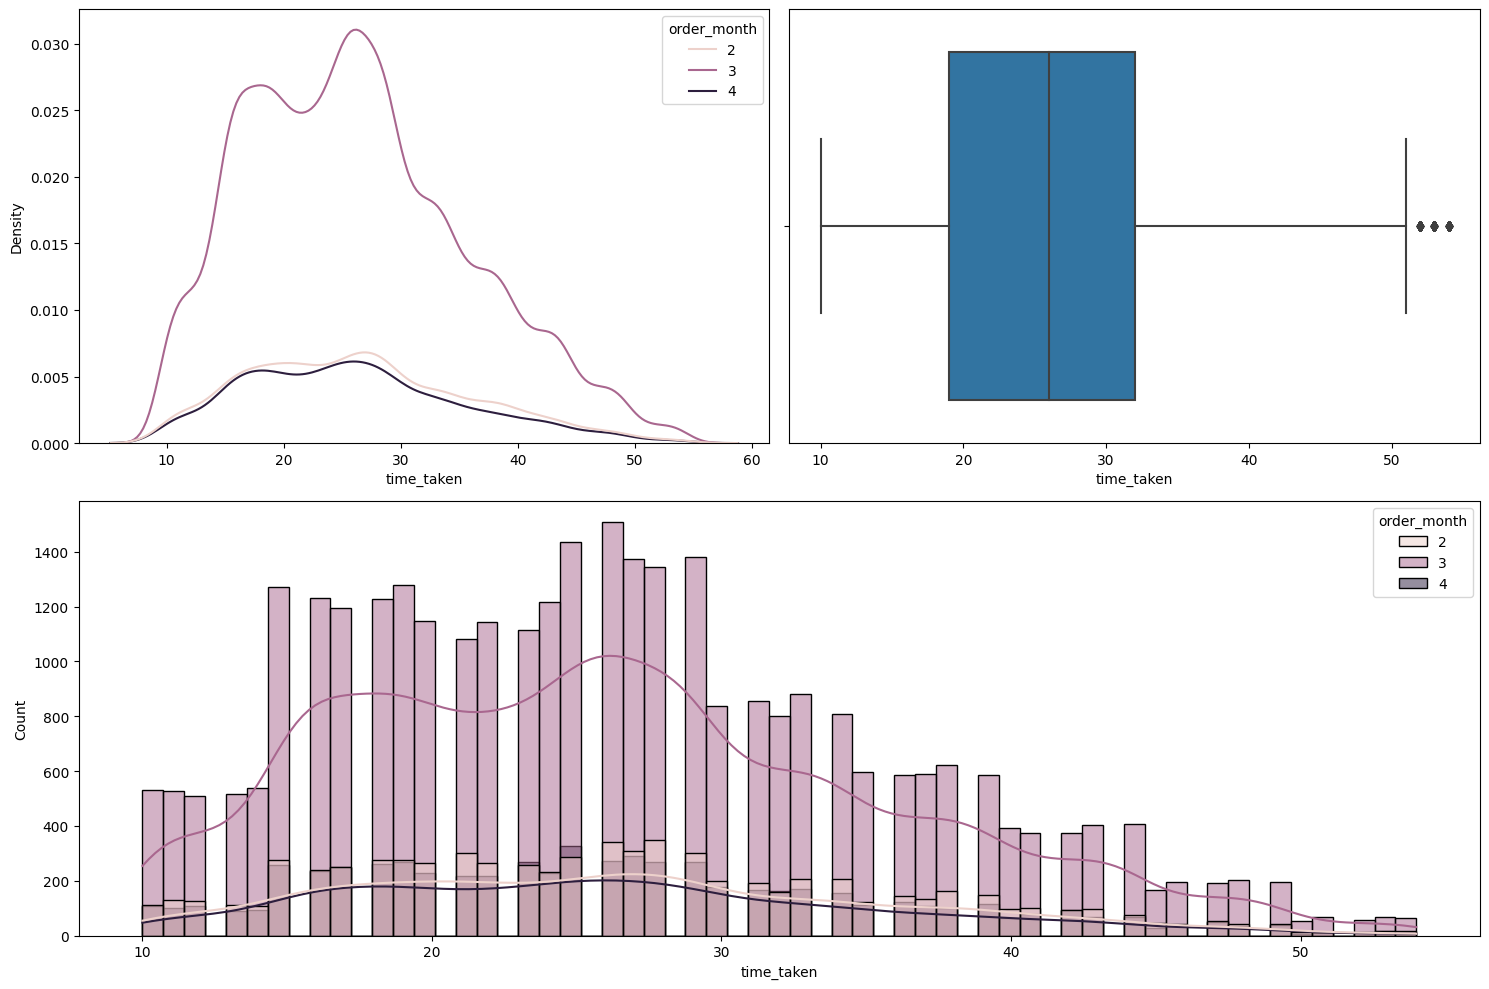

In [338]:
numerical_analysis(order_data_subset,'time_taken','order_month')

* February has the highest density of time_taken, with a broader distribution and longer tail, suggesting higher variability and possibly more delays.
* March and April show more consistency in delivery times, with lower densities and shorter tails.
* analyse more in details
* 

In [339]:
order_data_subset

order_date  order_day  order_month order_day_name  order_weekend  \
0      2022-03-19         19            3       Saturday              1   
1      2022-03-25         25            3         Friday              0   
2      2022-03-19         19            3       Saturday              1   
3      2022-04-05          5            4        Tuesday              0   
4      2022-03-26         26            3       Saturday              1   
...           ...        ...          ...            ...            ...   
45550  2022-03-24         24            3       Thursday              0   
45551  2022-02-16         16            2      Wednesday              0   
45552  2022-03-11         11            3         Friday              0   
45553  2022-03-07          7            3         Monday              0   
45554  2022-03-02          2            3      Wednesday              0   

      festival  time_taken  
0           No          24  
1           No          33  
2           No          26  
3           No          21  
4           No          30  
...        ...         ...  
45550       No          32  
45551       No          36  
45552       No          16  
45553       No          26  
45554       No          36  

[45555 rows x 7 columns]

Count Percentage
order_day_name                  
Wednesday        7085     15.55%
Friday           7027     15.43%
Tuesday          6369     13.98%
Thursday         6343     13.92%
Saturday         6285      13.8%
Sunday           6242      13.7%
Monday           6204     13.62%

**************************************************
The unique categories in order_day_name column are ['Saturday', 'Friday', 'Tuesday', 'Monday', 'Sunday', 'Wednesday', 'Thursday']
**************************************************
The number of categories in order_day_name column are 7


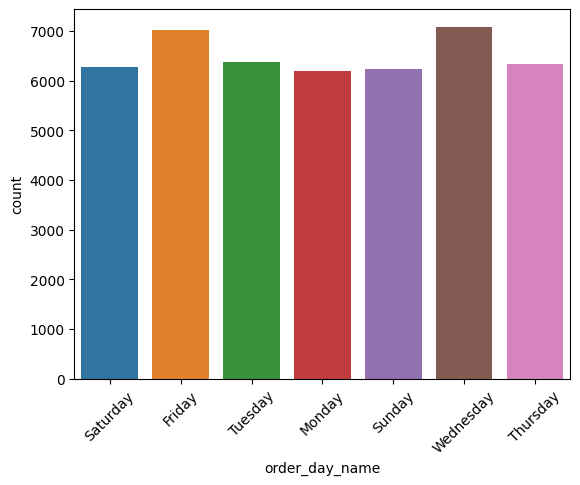

In [340]:
cleaned_data['order_day_name']
categorical_analysis(cleaned_data,column_name='order_day_name')

# pick time

(0.0, 20.0)

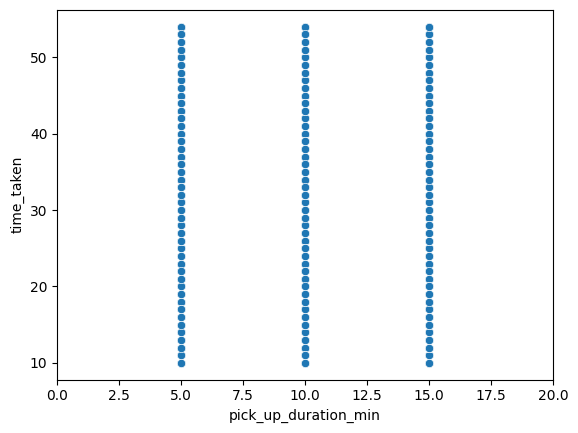

In [341]:
cleaned_data['pick_up_duration_min'].value_counts()
sns.scatterplot(data=cleaned_data,x='pick_up_duration_min',y='time_taken')
plt.xlim(0,20)

Count Percentage
pick_up_duration_min                  
 5.0                  14564      33.2%
 10.0                 14288     32.57%
 15.0                 14179     32.33%
-1425.0                 431      0.98%
-1430.0                 261       0.6%
-1435.0                 139      0.32%

**************************************************
The unique categories in pick_up_duration_min column are [15.0, 5.0, 10.0, nan, -1425.0, -1430.0, -1435.0]
**************************************************
The number of categories in pick_up_duration_min column are 6


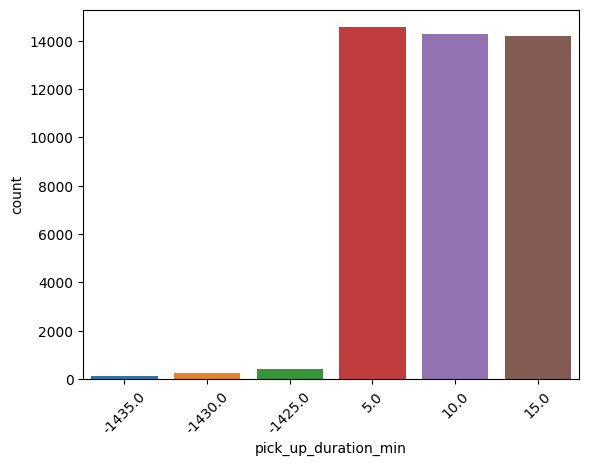

In [342]:
cleaned_data['pick_up_duration_min']
categorical_analysis(cleaned_data,'pick_up_duration_min')

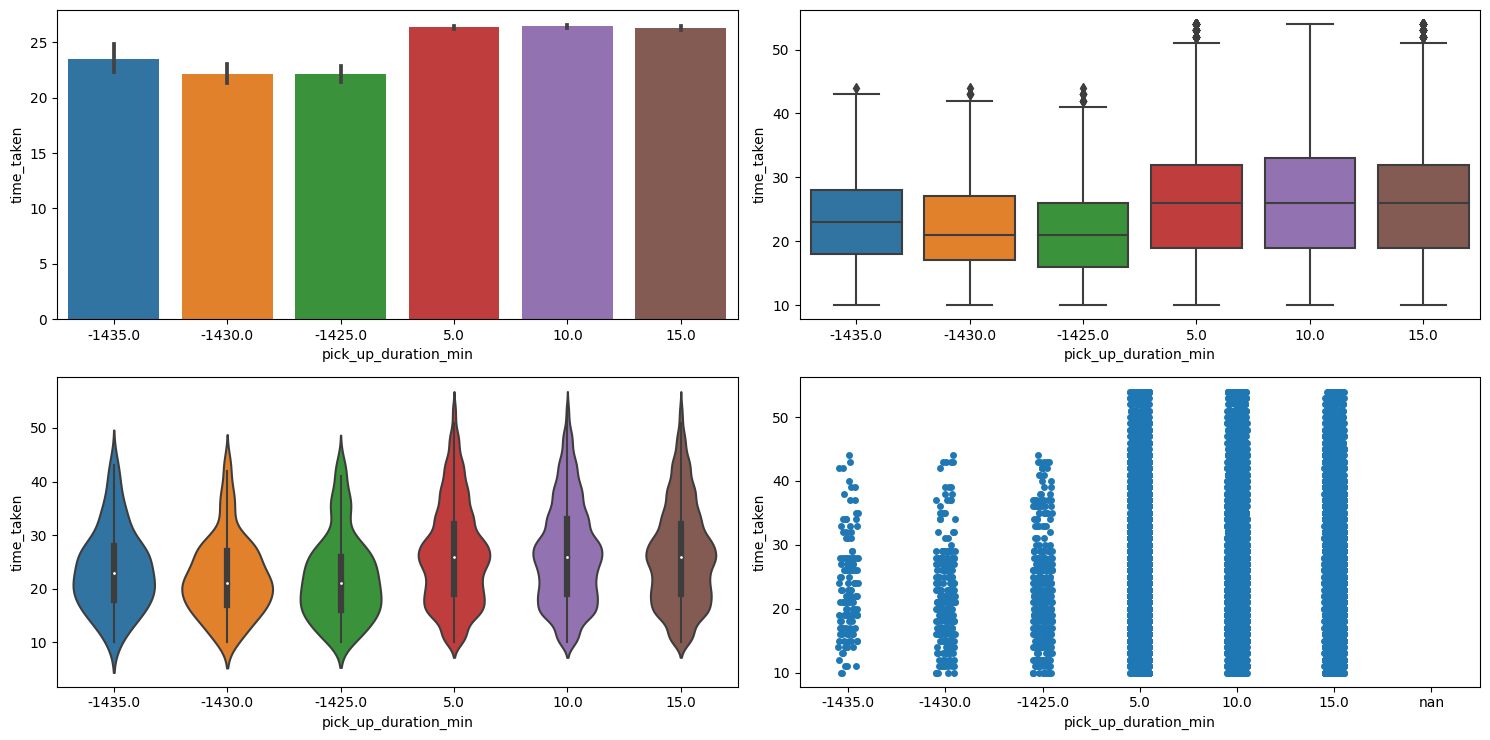

In [343]:
numerical_categorical_analysis(cleaned_data,'pick_up_duration_min','time_taken')
# cleaned_data.columns

In [344]:
anova_test(cleaned_data,'pick_up_duration_min','time_taken')

4.0155643330908318e-25
Reject the null hypothesis. There is a significant relationship between pick_up_duration_min and time_taken.


Count Percentage
road_traffic_density                  
low                   15477      34.4%
jam                   14143     31.43%
medium                10947     24.33%
high                   4425      9.84%

**************************************************
The unique categories in road_traffic_density column are ['high', 'jam', 'low', 'medium', nan]
**************************************************
The number of categories in road_traffic_density column are 4


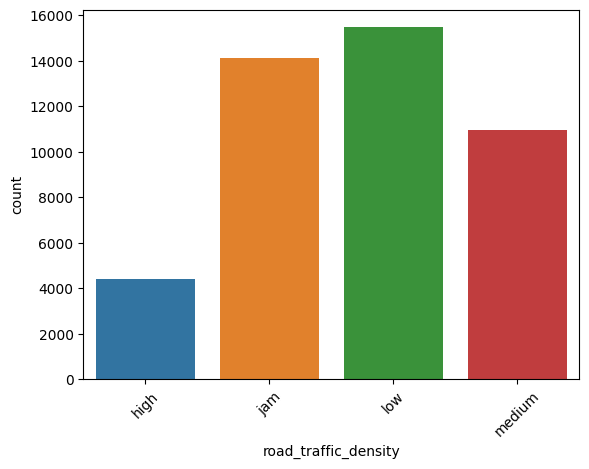

In [345]:
cleaned_data['road_traffic_density']
categorical_analysis(cleaned_data,'road_traffic_density')

In [346]:
chi_2_test(cleaned_data,'road_traffic_density','city')

2.3390790568495405e-104
Reject the null hypothesis. There is a significant association between road_traffic_density and city.


In [347]:
chi_2_test(cleaned_data,'rider_city','road_traffic_density')

0.49780801809552505
Fail to reject the null hypothesis. There is no significant association between rider_city and road_traffic_density.


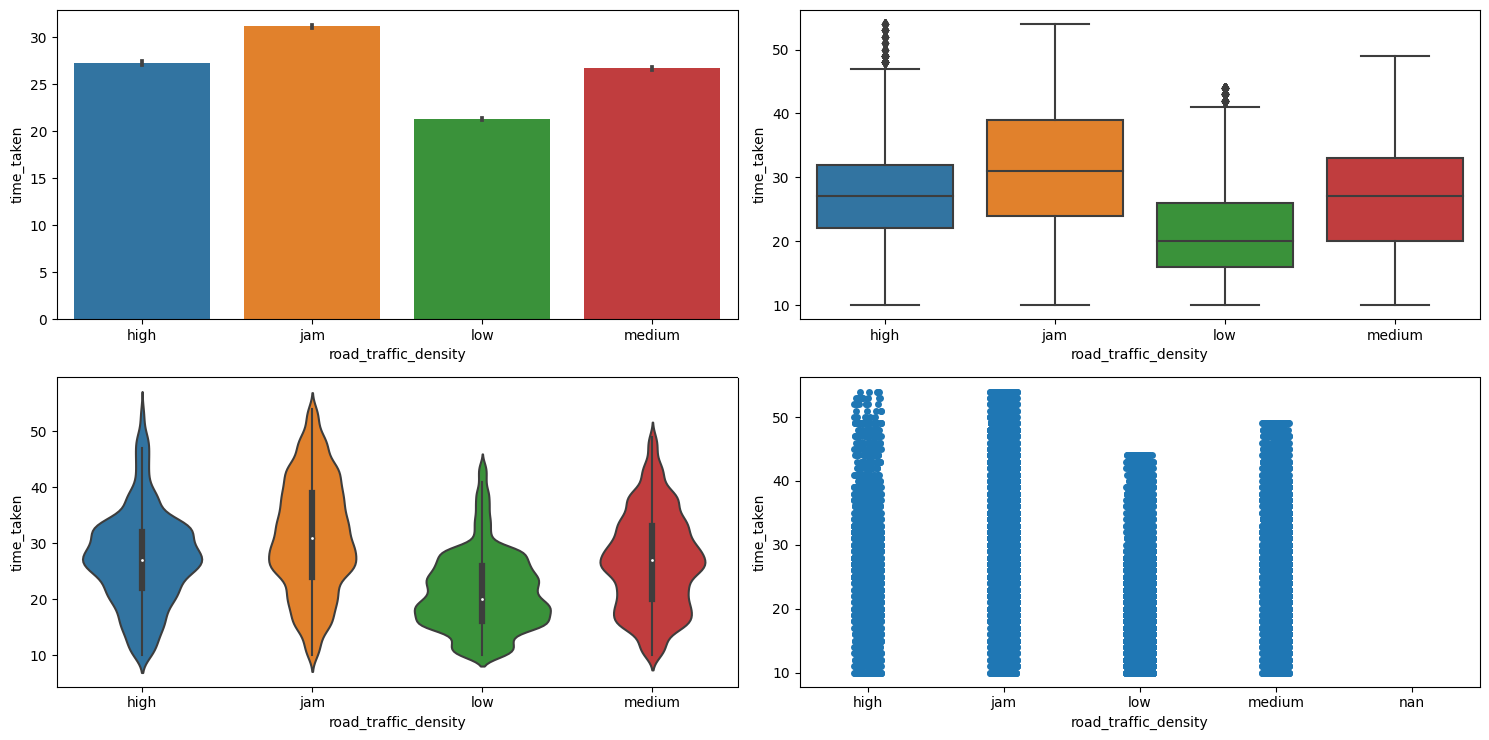

In [348]:
numerical_categorical_analysis(cleaned_data,'road_traffic_density','time_taken')

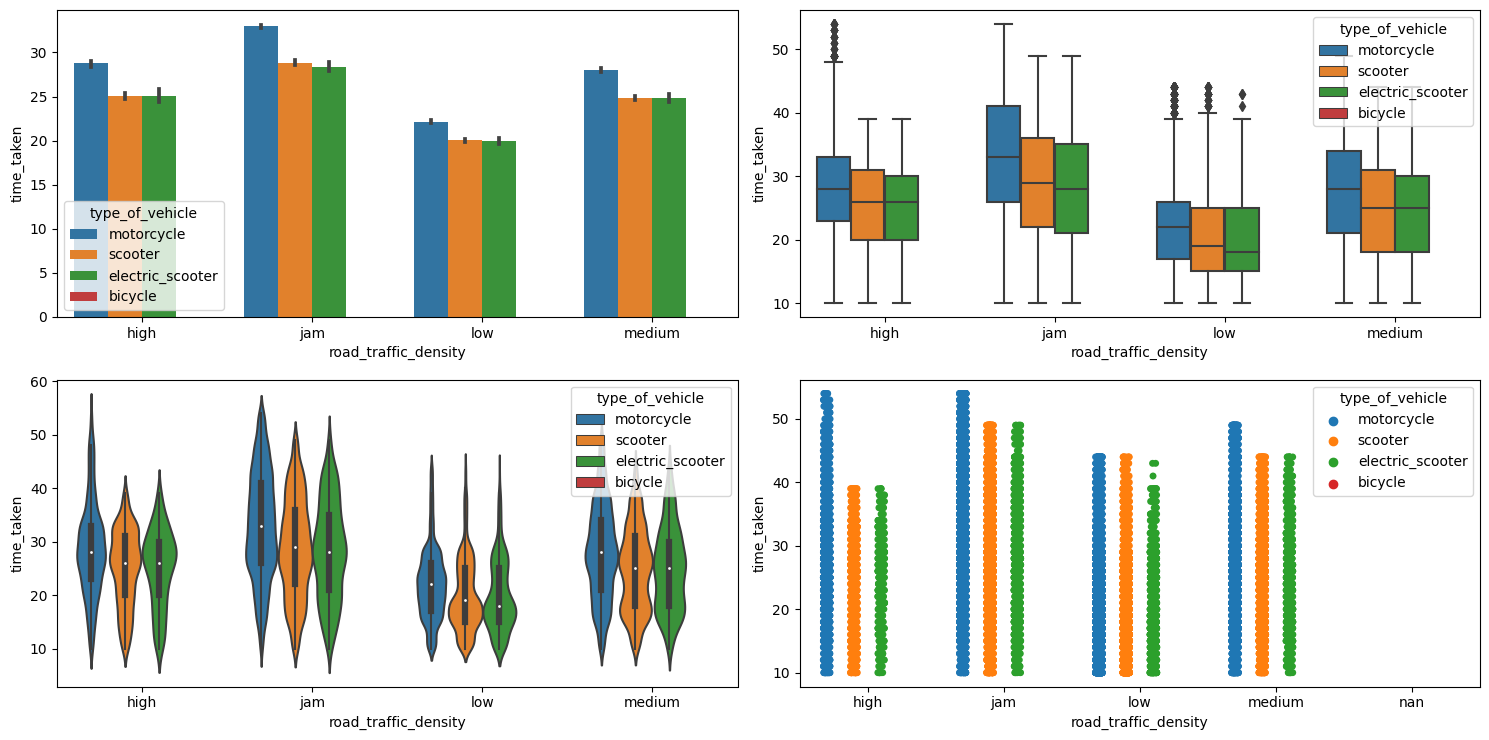

In [349]:
multivariate_analysis(cleaned_data,'time_taken','road_traffic_density','type_of_vehicle')

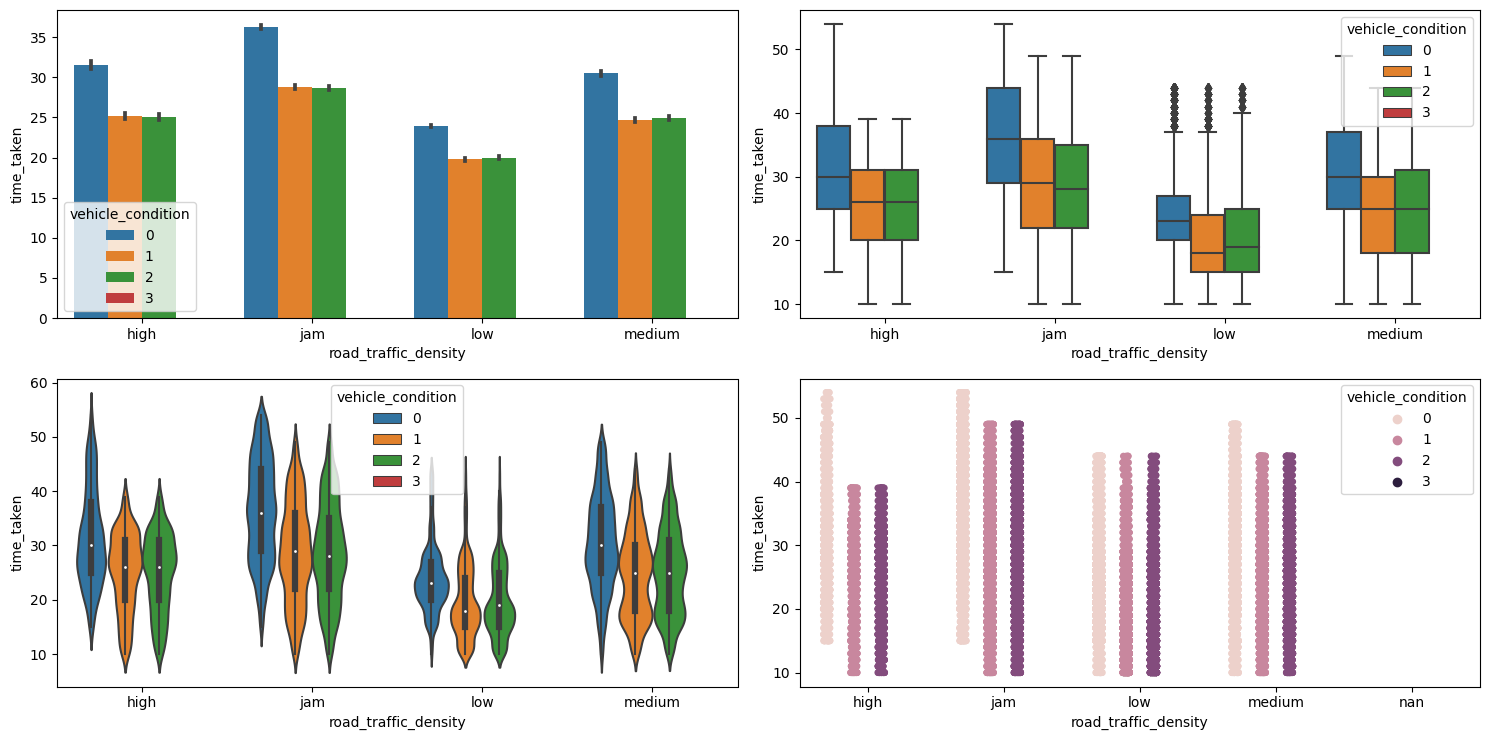

In [350]:
multivariate_analysis(cleaned_data,'time_taken','road_traffic_density','vehicle_condition')

# multiple deliveries

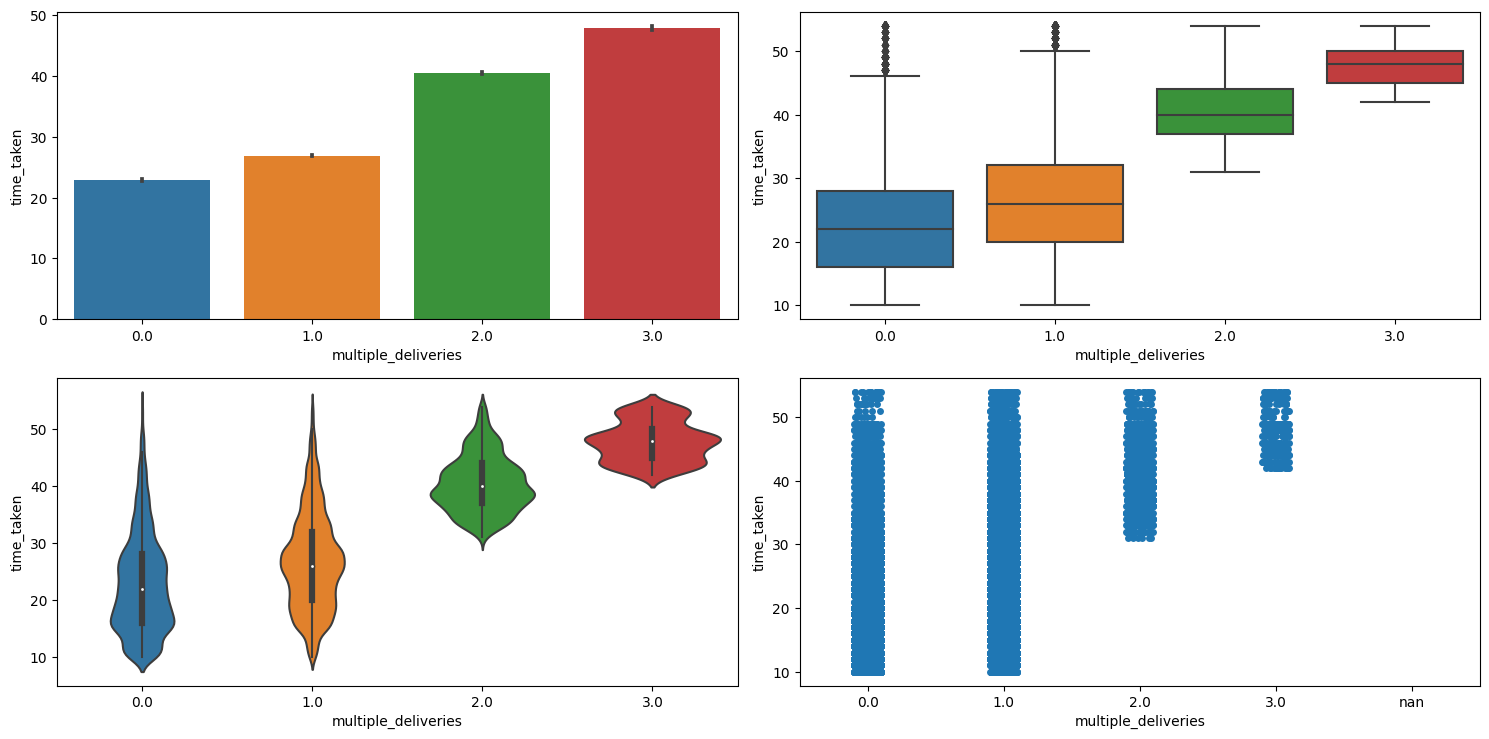

In [351]:
cleaned_data['multiple_deliveries']
numerical_categorical_analysis(cleaned_data,'multiple_deliveries','time_taken')


In [352]:
anova_test(cleaned_data,'time_taken','multiple_deliveries')

0.0
Reject the null hypothesis. There is a significant relationship between time_taken and multiple_deliveries.


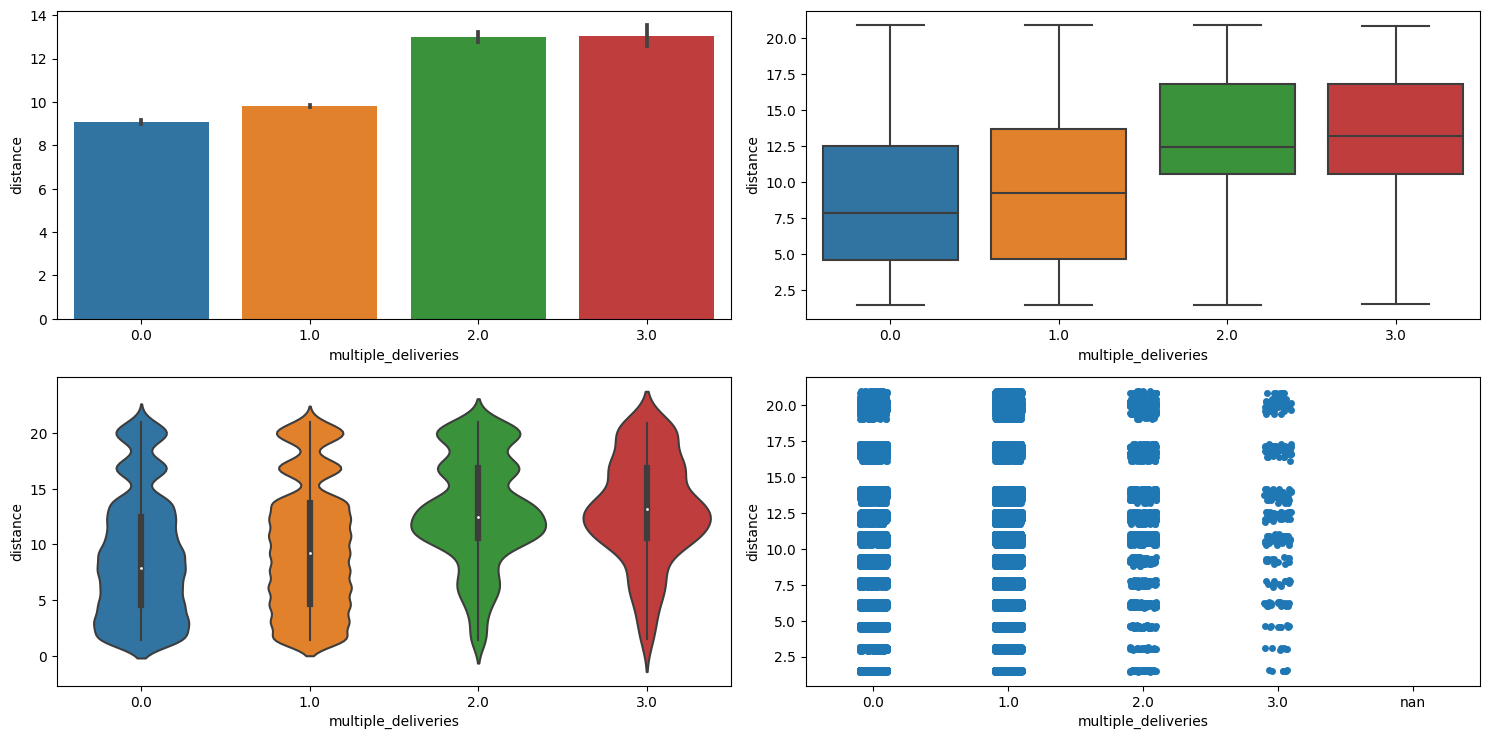

In [353]:
numerical_categorical_analysis(cleaned_data,'multiple_deliveries','distance')

# weather


Count Percentage
weather_conditions                  
fog                  7654     17.02%
stormy               7586     16.87%
cloudy               7536     16.76%
sandstorms           7495     16.66%
windy                7422      16.5%
sunny                7284     16.19%

**************************************************
The unique categories in weather_conditions column are ['sunny', 'stormy', 'sandstorms', 'cloudy', 'fog', 'windy', nan]
**************************************************
The number of categories in weather_conditions column are 6


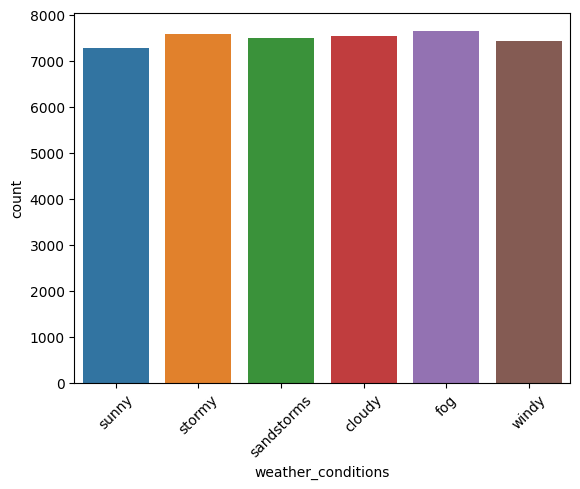

In [354]:
cleaned_data['weather_conditions'].dtype
categorical_analysis(cleaned_data,'weather_conditions')

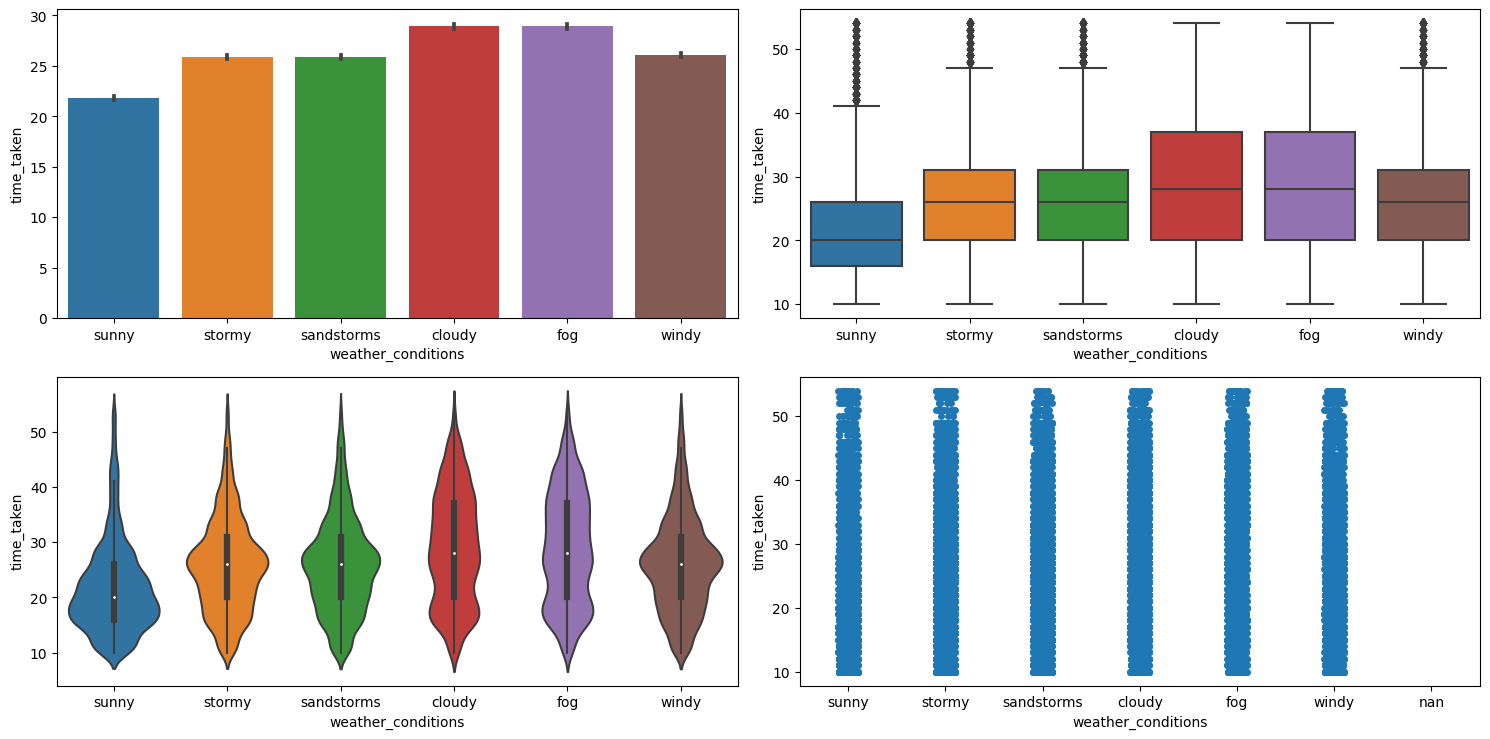

In [355]:
numerical_categorical_analysis(cleaned_data,'weather_conditions','time_taken')

In [356]:
anova_test(cleaned_data,"time_taken",'weather_conditions')

0.0
Reject the null hypothesis. There is a significant relationship between time_taken and weather_conditions.


In [357]:
chi_2_test(cleaned_data,'weather_conditions','road_traffic_density')

0.4796388074753828
Fail to reject the null hypothesis. There is no significant association between weather_conditions and road_traffic_density.


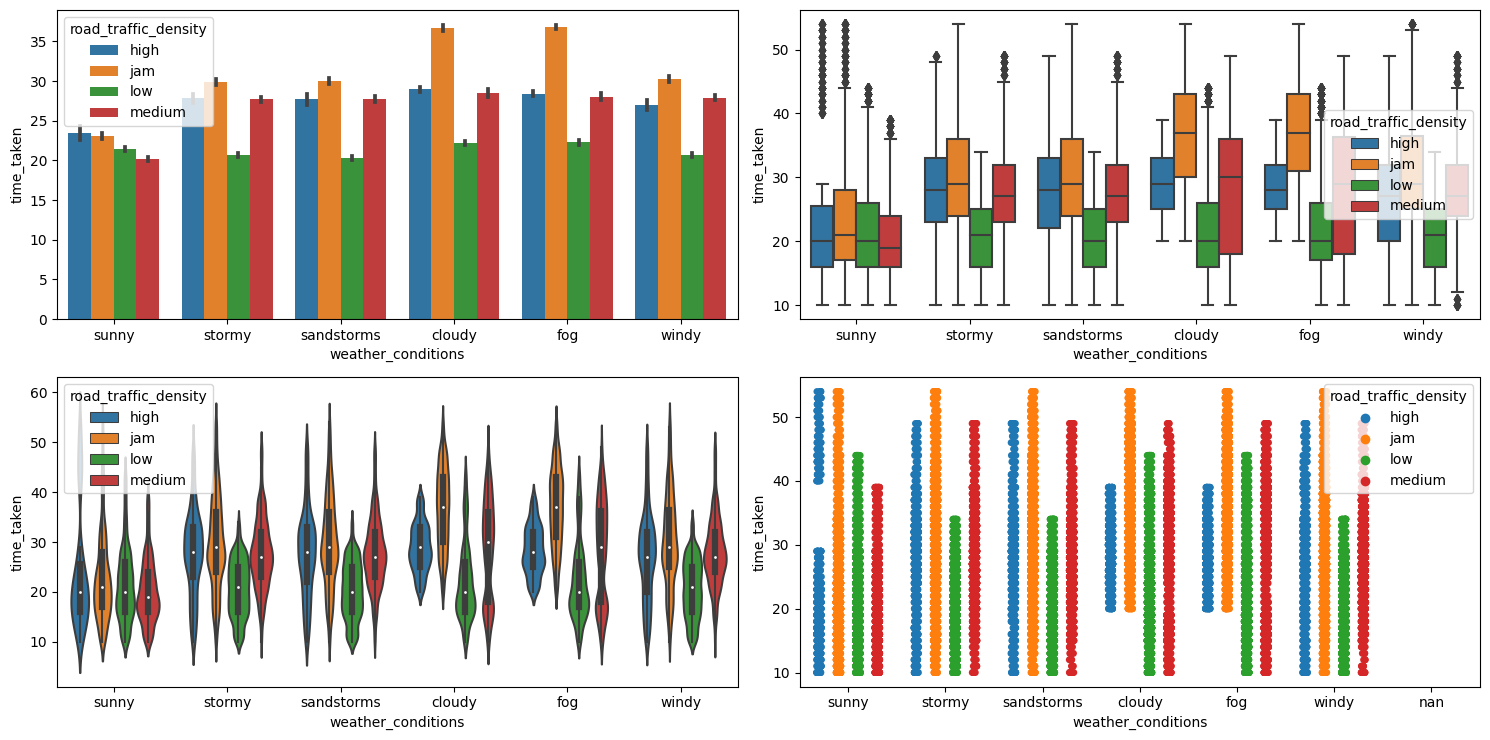

In [358]:
multivariate_analysis(cleaned_data,'time_taken','weather_conditions','road_traffic_density')

In [359]:
cleaned_data.pivot_table(index='weather_conditions',columns='type_of_vehicle',values='time_taken',aggfunc='mean')

type_of_vehicle     electric_scooter  motorcycle    scooter
weather_conditions                                         
cloudy                     27.460000   29.854496  27.661209
fog                        27.377329   29.903755  27.589153
sandstorms                 23.705479   27.316343  23.889590
stormy                     23.640728   27.196392  24.091480
sunny                      19.594958   23.547675  19.449198
windy                      24.104907   27.681601  23.784717

In [360]:
cleaned_data.pivot_table(index='weather_conditions',columns='type_of_vehicle',values='distance',aggfunc='mean')

type_of_vehicle     electric_scooter  motorcycle   scooter
weather_conditions                                        
cloudy                      9.587341    9.823238  9.805147
fog                         9.638588    9.725669  9.852516
sandstorms                  9.722308    9.679891  9.697900
stormy                     10.033514    9.669796  9.820676
sunny                       9.787664    9.524296  9.765034
windy                       9.674073    9.836190  9.717845

In [361]:
pd.pivot_table(cleaned_data,index='weather_conditions',columns='road_traffic_density',values='time_taken',aggfunc='mean')

road_traffic_density       high        jam        low     medium
weather_conditions                                              
cloudy                28.940860  36.689655  22.208445  28.483134
fog                   28.426546  36.806916  22.303427  28.044816
sandstorms            27.711840  30.018758  20.297049  27.738522
stormy                27.845839  29.850194  20.681734  27.680502
sunny                 23.448980  23.082132  21.449293  20.195518
windy                 26.972789  30.219056  20.665862  27.888769

# Vehicle - Condition and Type

Count Percentage
type_of_vehicle                   
motorcycle        26431     58.02%
scooter           15263      33.5%
electric_scooter   3801      8.34%
bicycle              60      0.13%

**************************************************
The unique categories in type_of_vehicle column are ['motorcycle', 'scooter', 'electric_scooter', 'bicycle']
**************************************************
The number of categories in type_of_vehicle column are 4


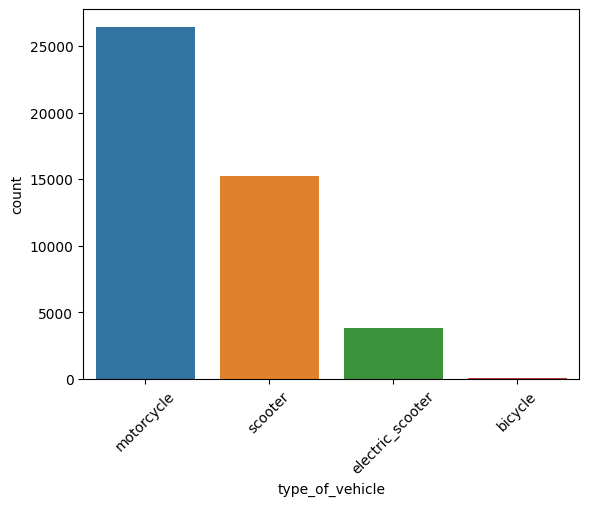

In [362]:
categorical_analysis(cleaned_data,'type_of_vehicle')

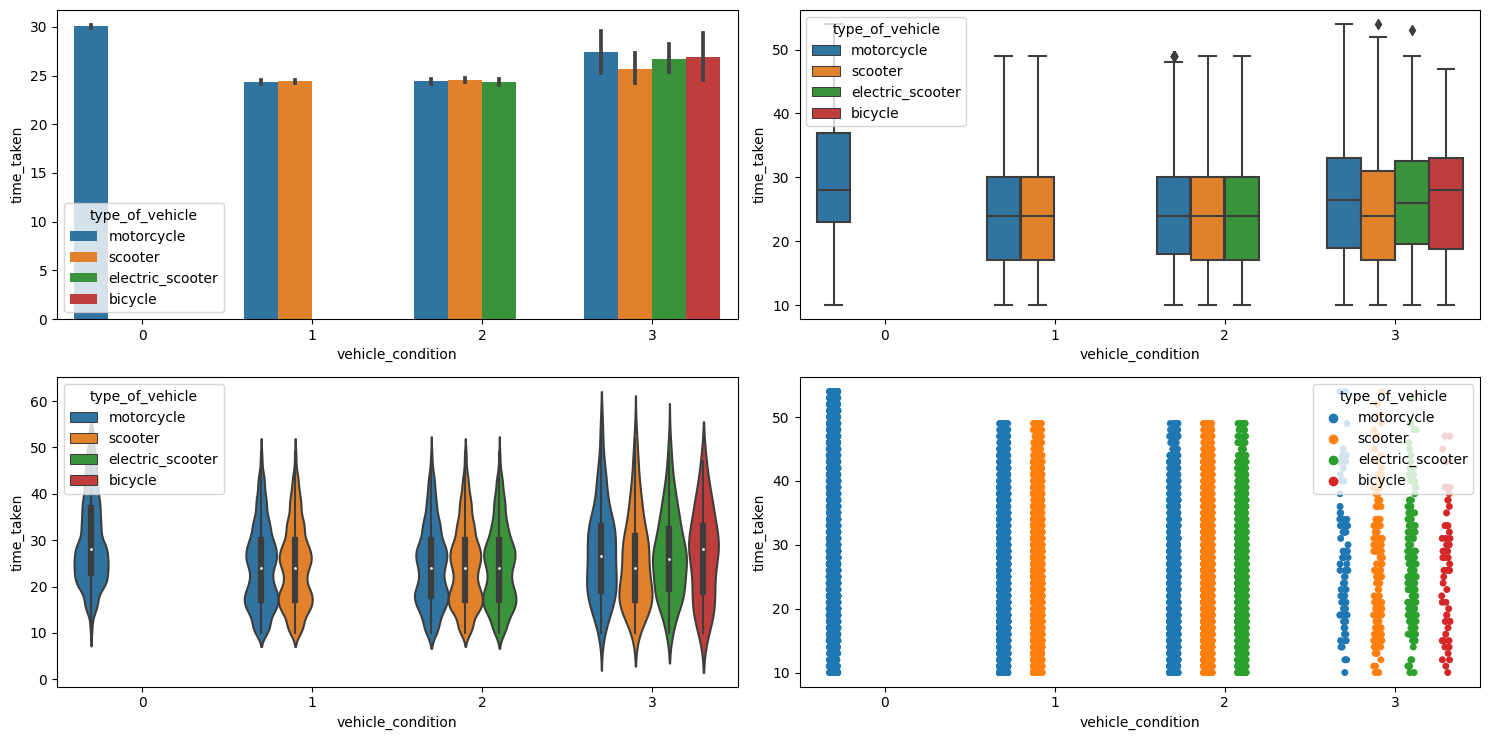

In [363]:
multivariate_analysis(cleaned_data,"time_taken",'vehicle_condition','type_of_vehicle')

In [364]:
chi_2_test(cleaned_data,'vehicle_condition','type_of_vehicle')

0.0
Reject the null hypothesis. There is a significant association between vehicle_condition and type_of_vehicle.


In [365]:
pd.pivot_table(cleaned_data,index='type_of_vehicle',columns='vehicle_condition',values="time_taken",aggfunc='mean')

vehicle_condition          0          1          2          3
type_of_vehicle                                              
bicycle                  NaN        NaN        NaN  26.950000
electric_scooter         NaN        NaN  24.355764  26.742857
motorcycle         30.072223  24.304497  24.414868  27.395349
scooter                  NaN  24.406607  24.522534  25.683230

# Type of order

In [366]:
cleaned_data['type_of_order'].dtype

dtype('O')

Count Percentage
type_of_order                  
Snack          11521     25.29%
Meal           11450     25.13%
Drinks         11314     24.84%
Buffet         11270     24.74%

**************************************************
The unique categories in type_of_order column are ['Snack', 'Drinks', 'Buffet', 'Meal']
**************************************************
The number of categories in type_of_order column are 4


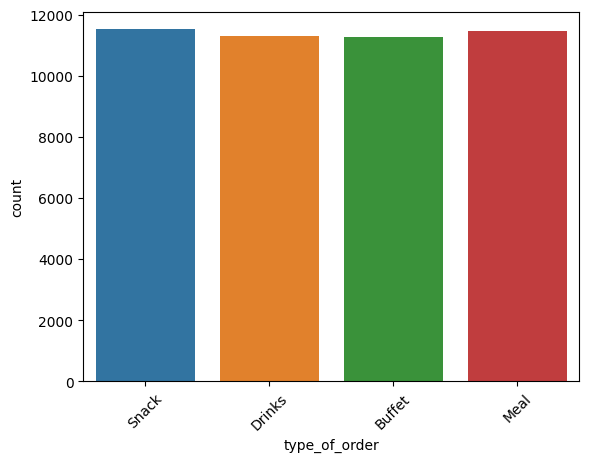

In [367]:
categorical_analysis(cleaned_data,'type_of_order')

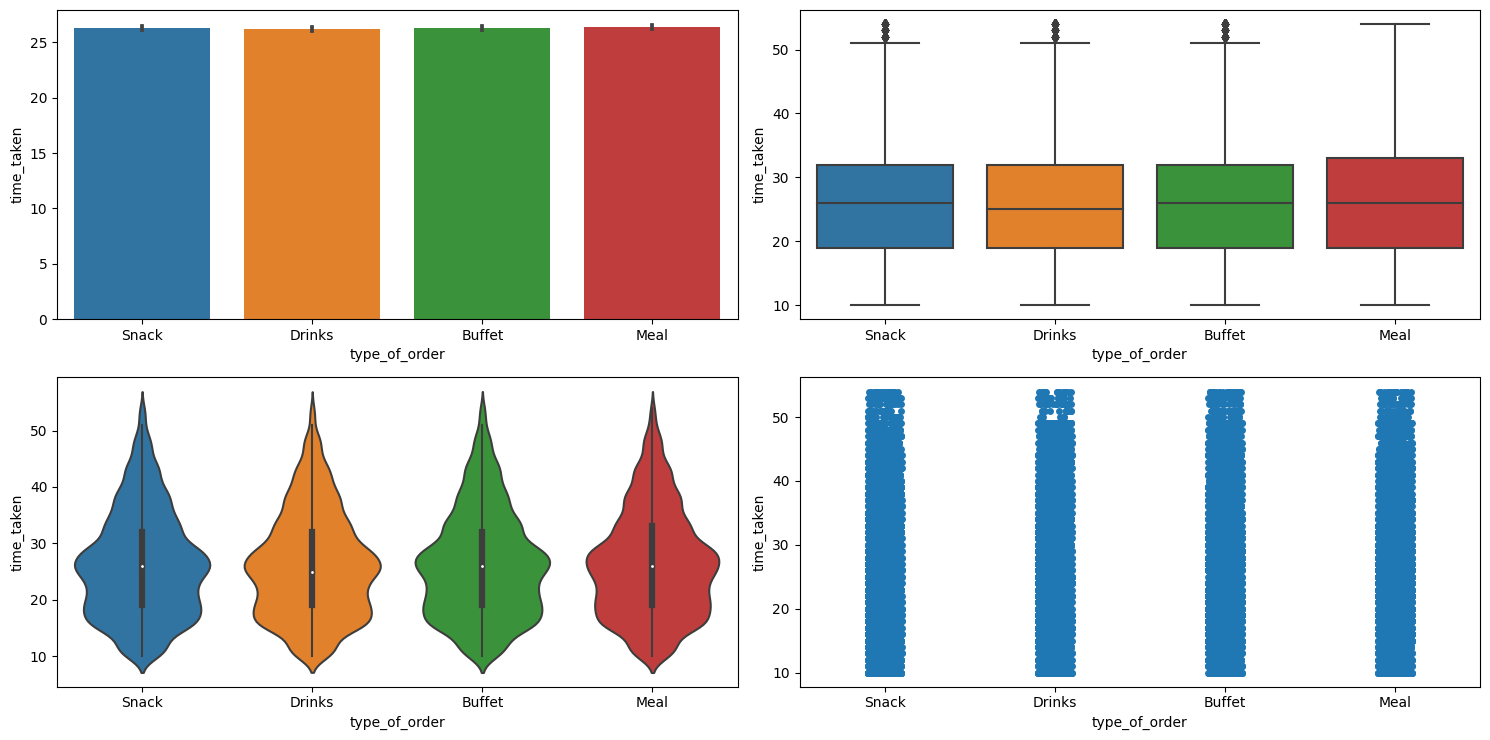

In [368]:
numerical_categorical_analysis(cleaned_data,'type_of_order','time_taken')

In [369]:
anova_test(cleaned_data,'time_taken','type_of_order')

0.3122078368084183
Fail to reject the null hypothesis. There is no significant relationship between time_taken and type_of_order.


In [370]:
pd.pivot_table(cleaned_data,index='type_of_order',columns=['festival','order_weekend'],values='time_taken',aggfunc='mean')

festival              No                   Yes           
order_weekend          0          1          0          1
type_of_order                                            
Buffet         25.968163  25.969523  45.737500  46.771930
Drinks         26.001637  25.641540  45.253247  44.892308
Meal           26.098630  26.201754  45.679012  45.018519
Snack          25.949723  25.926908  45.394118  45.493151

In [371]:
pd.pivot_table(cleaned_data,index='type_of_order',columns=['weather_conditions'],values='time_taken',aggfunc='mean')

weather_conditions     cloudy        fog  sandstorms     stormy      sunny  \
type_of_order                                                                
Buffet              28.713753  28.760064   26.157260  25.817792  21.789093   
Drinks              28.901579  28.550186   25.711549  25.934884  21.963881   
Meal                29.115672  28.995838   25.889984  26.082555  21.998334   
Snack               28.938429  29.332326   25.748956  25.637977  21.676133   

weather_conditions      windy  
type_of_order                  
Buffet              26.290747  
Drinks              25.986555  
Meal                26.205003  
Snack               25.987342

In [372]:
pd.crosstab(cleaned_data['type_of_order'],cleaned_data['order_weekend'],margins_name='Total',margins=True)

order_weekend      0      1  Total
type_of_order                     
Buffet          8245   3025  11270
Drinks          8140   3174  11314
Meal            8300   3150  11450
Snack           8343   3178  11521
Total          33028  12527  45555

In [373]:
pd.crosstab(cleaned_data['type_of_order'],cleaned_data['road_traffic_density'],margins_name='Total',margins=True)

road_traffic_density  high    jam    low  medium  Total
type_of_order                                          
Buffet                1124   3473   3826    2712  11135
Drinks                1099   3484   3828    2780  11191
Meal                  1130   3576   3867    2719  11292
Snack                 1072   3610   3956    2736  11374
Total                 4425  14143  15477   10947  44992

In [374]:
pd.crosstab(cleaned_data['type_of_order'],cleaned_data['road_traffic_density'],values= cleaned_data['time_taken'],aggfunc='mean',margins=True)

road_traffic_density       high        jam        low     medium        All
type_of_order                                                              
Buffet                27.031139  31.433055  21.228698  26.508481  26.283071
Drinks                27.409463  30.857635  21.209248  26.723741  26.191761
Meal                  27.330088  31.127517  21.452547  26.910261  26.418792
Snack                 27.190299  31.286427  21.178463  26.655336  26.270705
All                   27.240000  31.176624  21.266977  26.699644  26.291296

In [375]:
chi_2_test(cleaned_data, 'type_of_order','pick_up_duration_min')

0.08085382765389754
Fail to reject the null hypothesis. There is no significant association between type_of_order and pick_up_duration_min.


In [376]:
anova_test(cleaned_data,'time_taken','type_of_order')

0.3122078368084183
Fail to reject the null hypothesis. There is no significant relationship between time_taken and type_of_order.


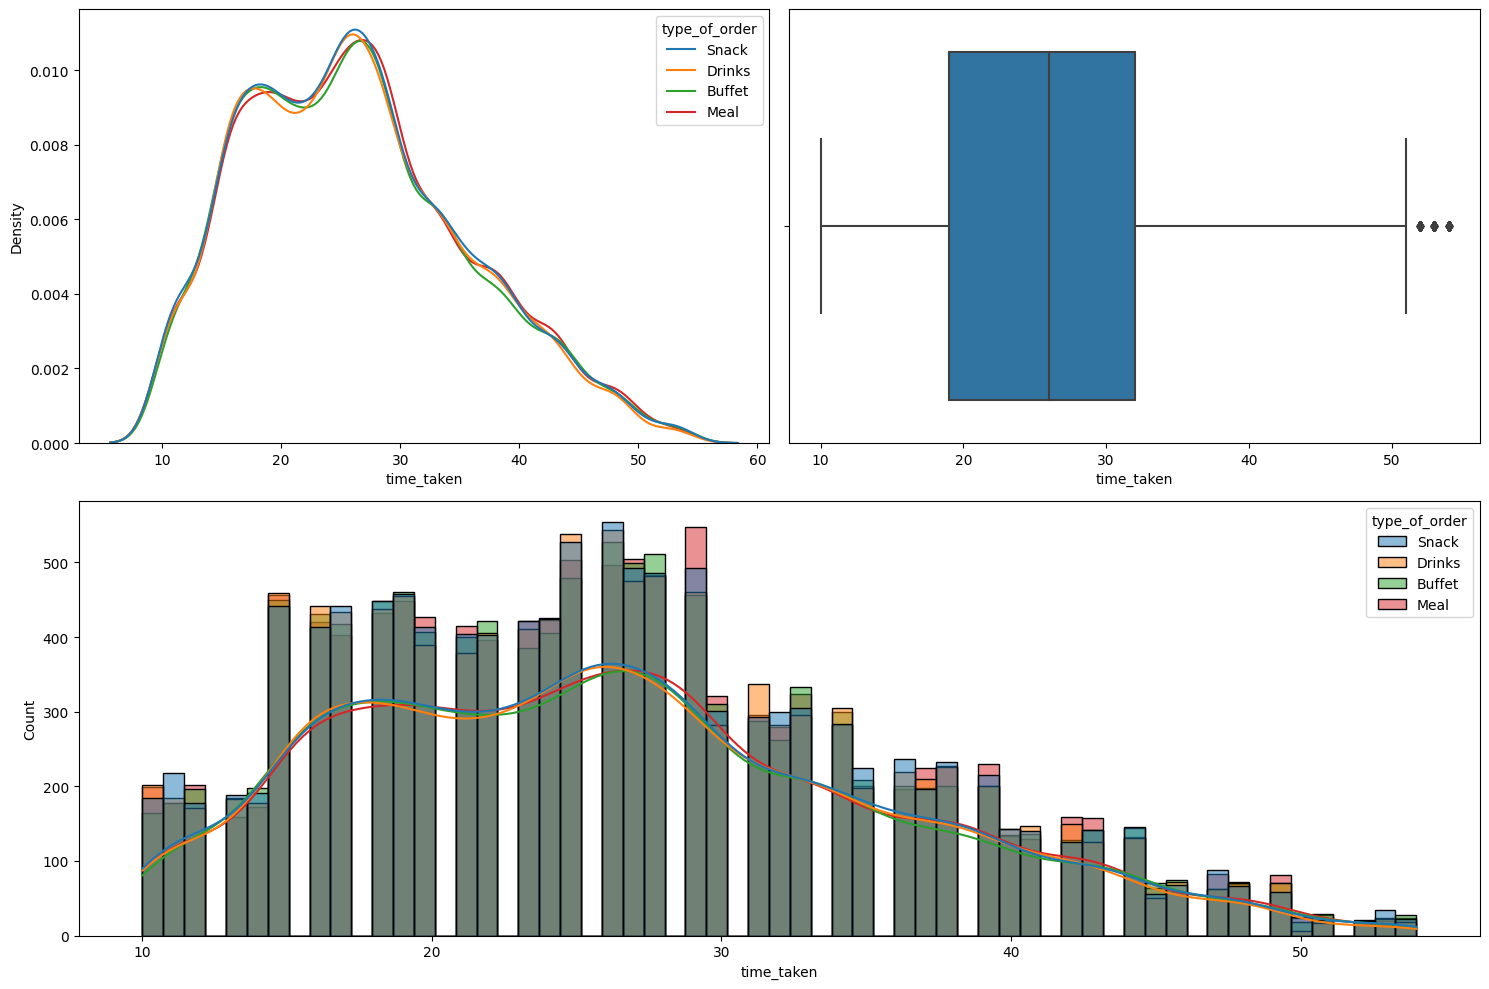

In [377]:
numerical_analysis(cleaned_data,'time_taken','type_of_order')

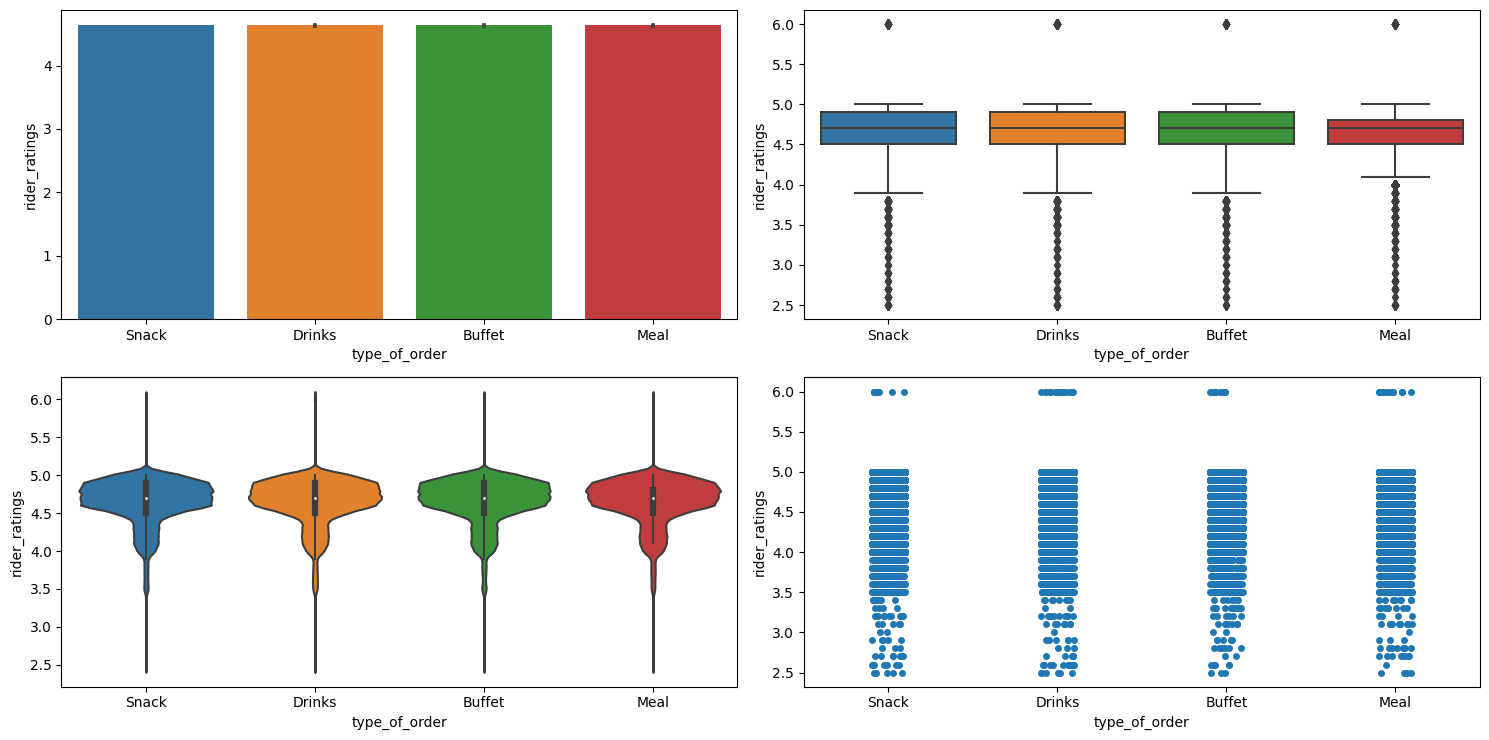

In [378]:
numerical_categorical_analysis(cleaned_data,'type_of_order','rider_ratings')

In [379]:
chi_2_test(cleaned_data,'type_of_order','festival')

0.630277005940266
Fail to reject the null hypothesis. There is no significant association between type_of_order and festival.


In [380]:
chi_2_test(cleaned_data,'type_of_order','road_traffic_density')

0.6729576762090983
Fail to reject the null hypothesis. There is no significant association between type_of_order and road_traffic_density.


In [381]:
chi_2_test(cleaned_data,'type_of_order','order_day')

0.42222698891121013
Fail to reject the null hypothesis. There is no significant association between type_of_order and order_day.


In [382]:
chi_2_test(cleaned_data,'type_of_order','order_weekend')

0.23712771272802788
Fail to reject the null hypothesis. There is no significant association between type_of_order and order_weekend.


# 'city'

In [383]:
cleaned_data['city'].dtype

dtype('O')

Count Percentage
city                           
metropolitian  34066      76.8%
urban          10125     22.83%
semi-urban       164      0.37%

**************************************************
The unique categories in city column are ['urban', 'metropolitian', 'semi-urban', nan]
**************************************************
The number of categories in city column are 3


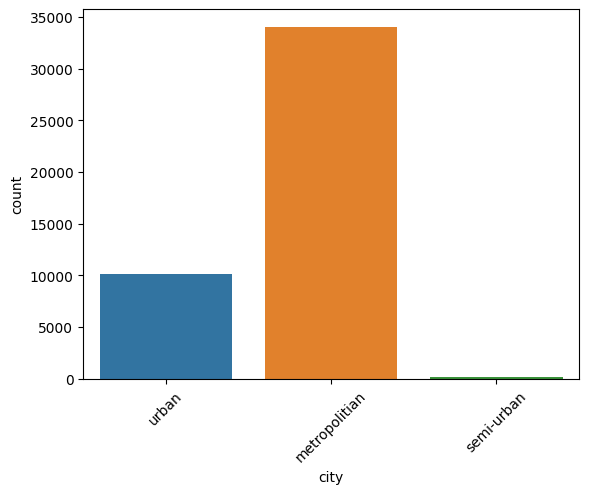

In [384]:
categorical_analysis(cleaned_data,'city')

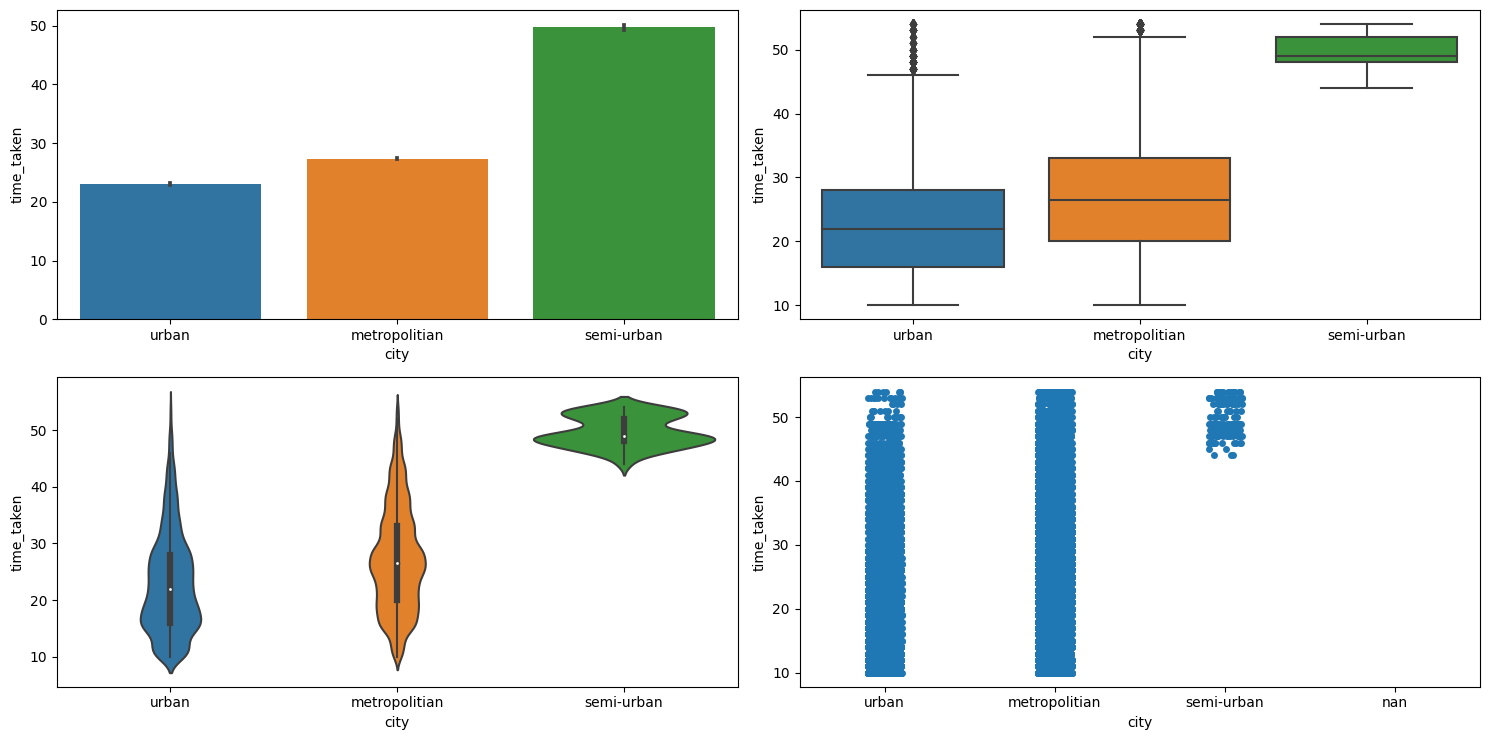

In [385]:
numerical_categorical_analysis(cleaned_data,'city','time_taken')

In [386]:
anova_test(cleaned_data,'time_taken','city')

0.0
Reject the null hypothesis. There is a significant relationship between time_taken and city.


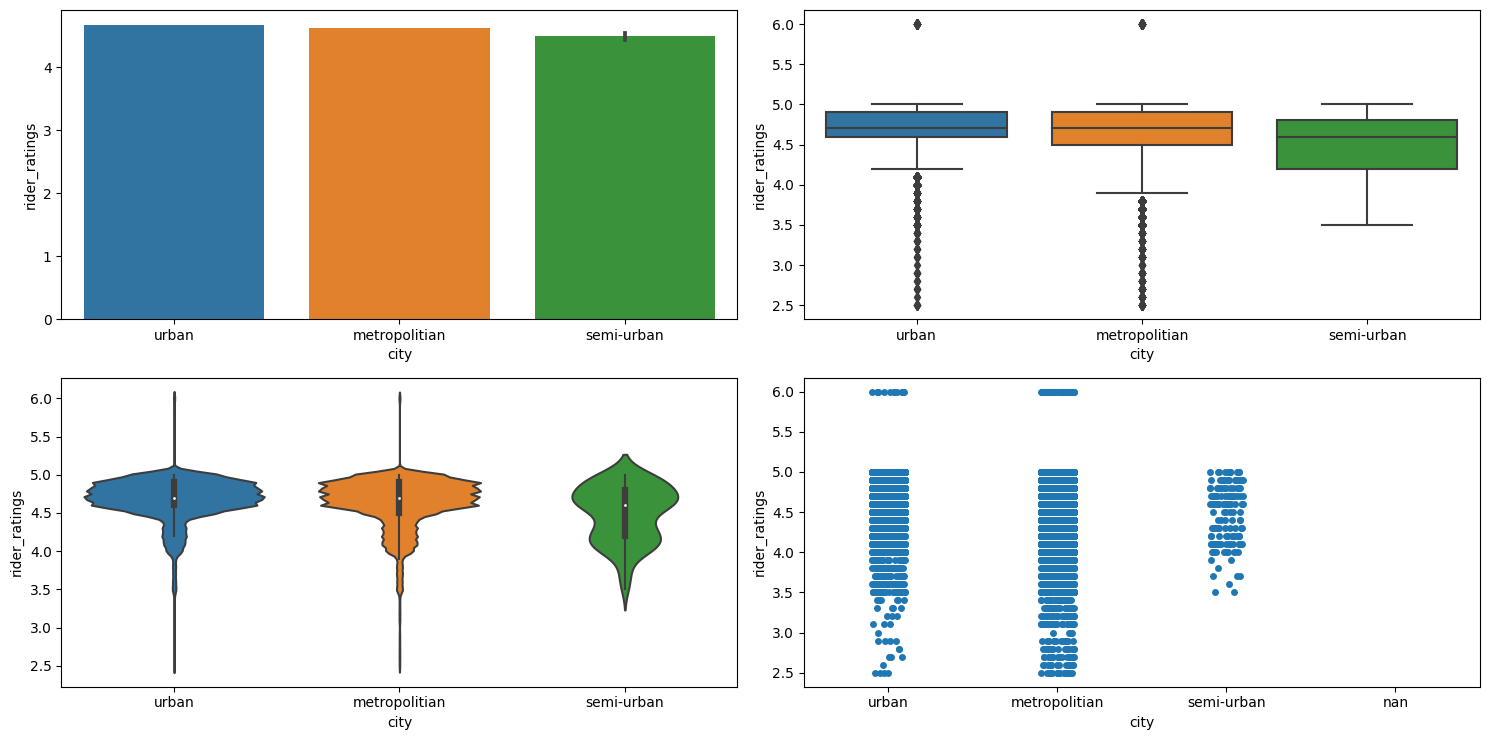

In [387]:
numerical_categorical_analysis(cleaned_data,'city','rider_ratings')

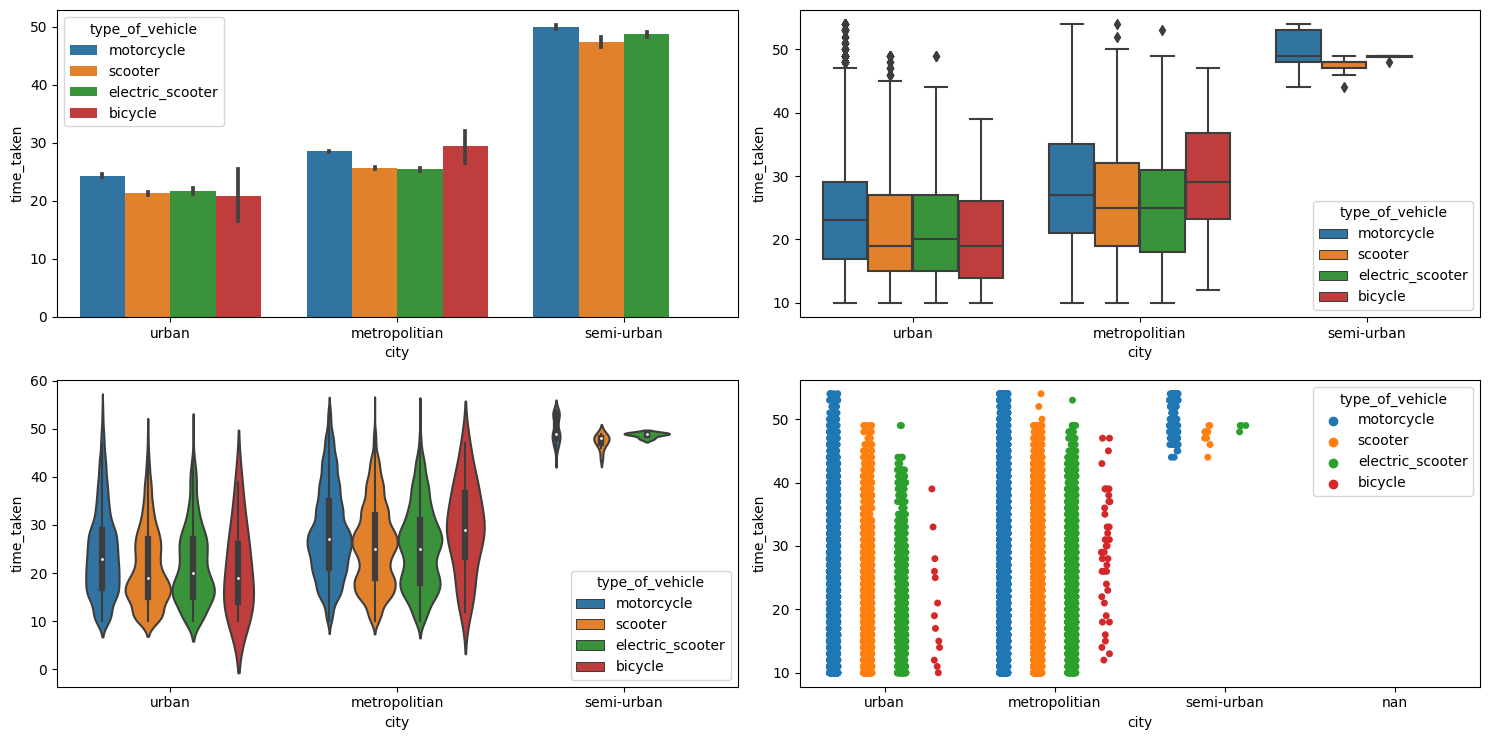

In [388]:
multivariate_analysis(cleaned_data,'time_taken', 'city','type_of_vehicle')

In [389]:
chi_2_test(cleaned_data, 'city','time_taken')

0.0
Reject the null hypothesis. There is a significant association between city and time_taken.


In [390]:
pd.pivot_table(cleaned_data,index='city',columns='road_traffic_density',values='time_taken',aggfunc='mean')

road_traffic_density       high        jam        low     medium
city                                                            
metropolitian         28.108470  31.910099  22.129654  27.611031
semi-urban            50.058824  49.888889        NaN  47.454545
urban                 24.125926  27.743434  19.244075  23.730900

In [391]:
pd.crosstab(cleaned_data['city'],cleaned_data['road_traffic_density'])

road_traffic_density  high    jam    low  medium
city                                            
metropolitian         3365  11090  10852    8322
semi-urban              17    135      0      11
urban                  945   2627   4093    2356

In [392]:
chi_2_test(cleaned_data,'city','road_traffic_density')

2.3390790568495405e-104
Reject the null hypothesis. There is a significant association between city and road_traffic_density.


# distance

In [393]:
cleaned_data['distance'].dtype

dtype('float64')

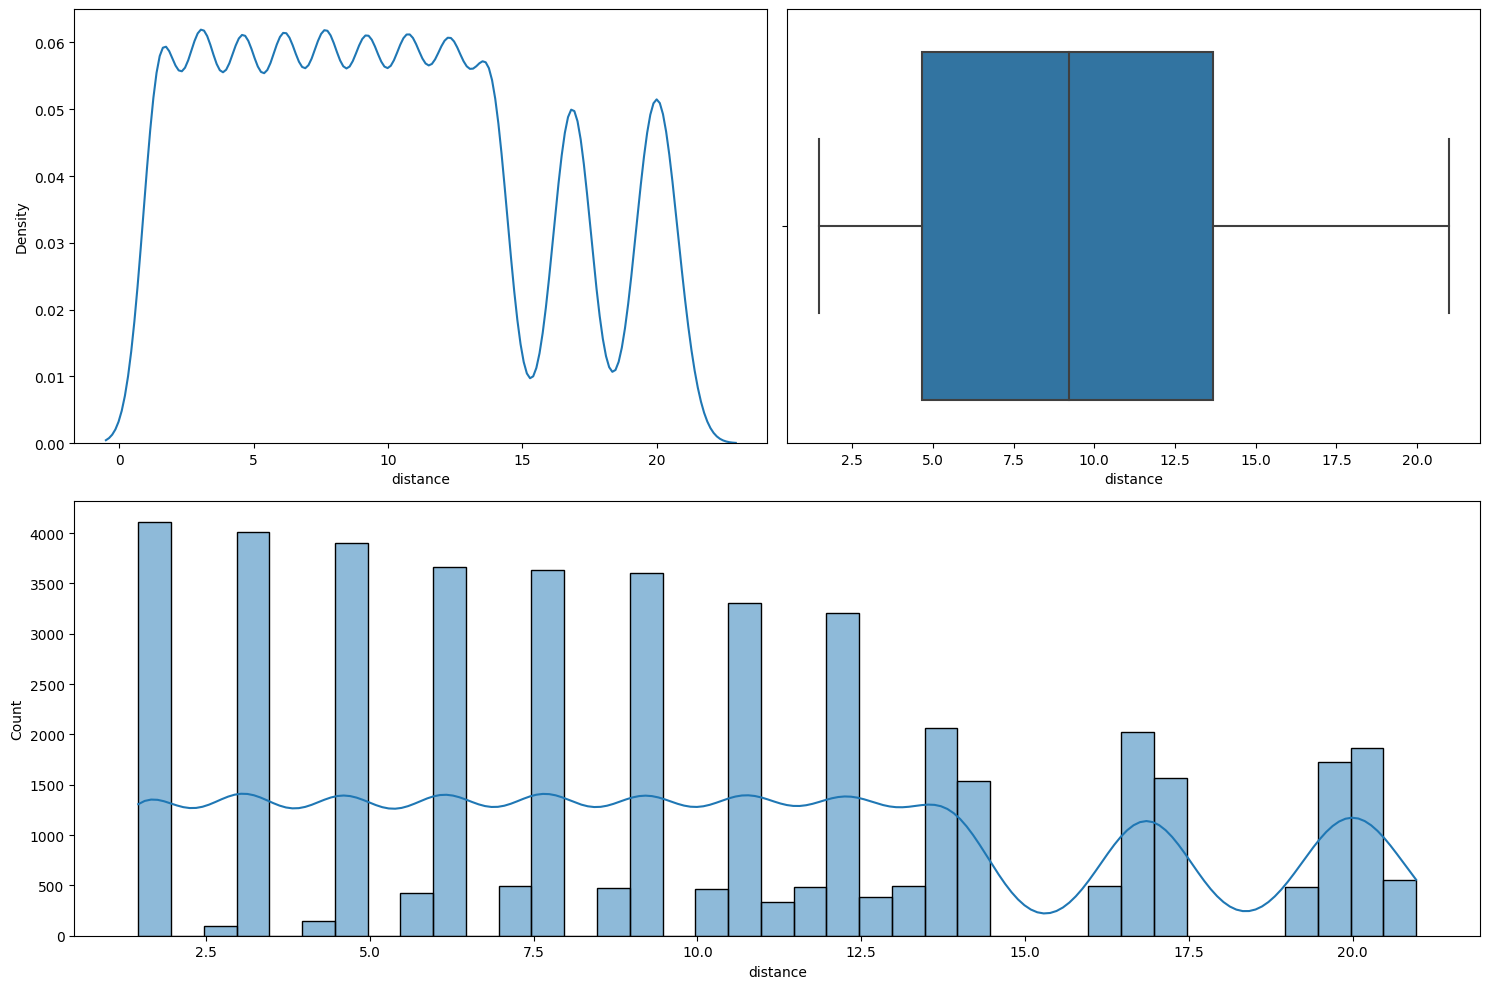

In [394]:
numerical_analysis(cleaned_data,'distance')

<Axes: xlabel='distance', ylabel='time_taken'>

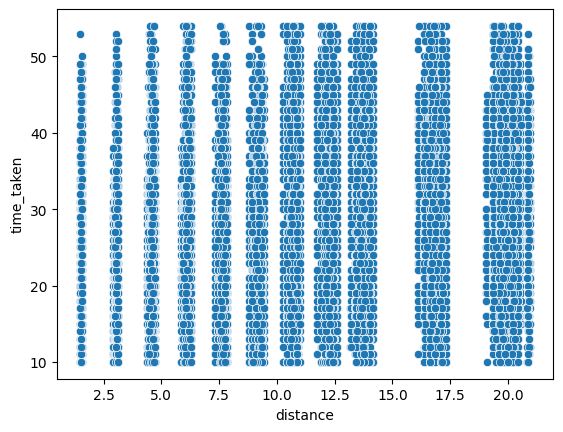

In [395]:
sns.scatterplot(cleaned_data,x='distance',y='time_taken')

In [396]:
cleaned_data[['time_taken','distance']].corr()

time_taken  distance
time_taken    1.000000  0.321308
distance      0.321308  1.000000

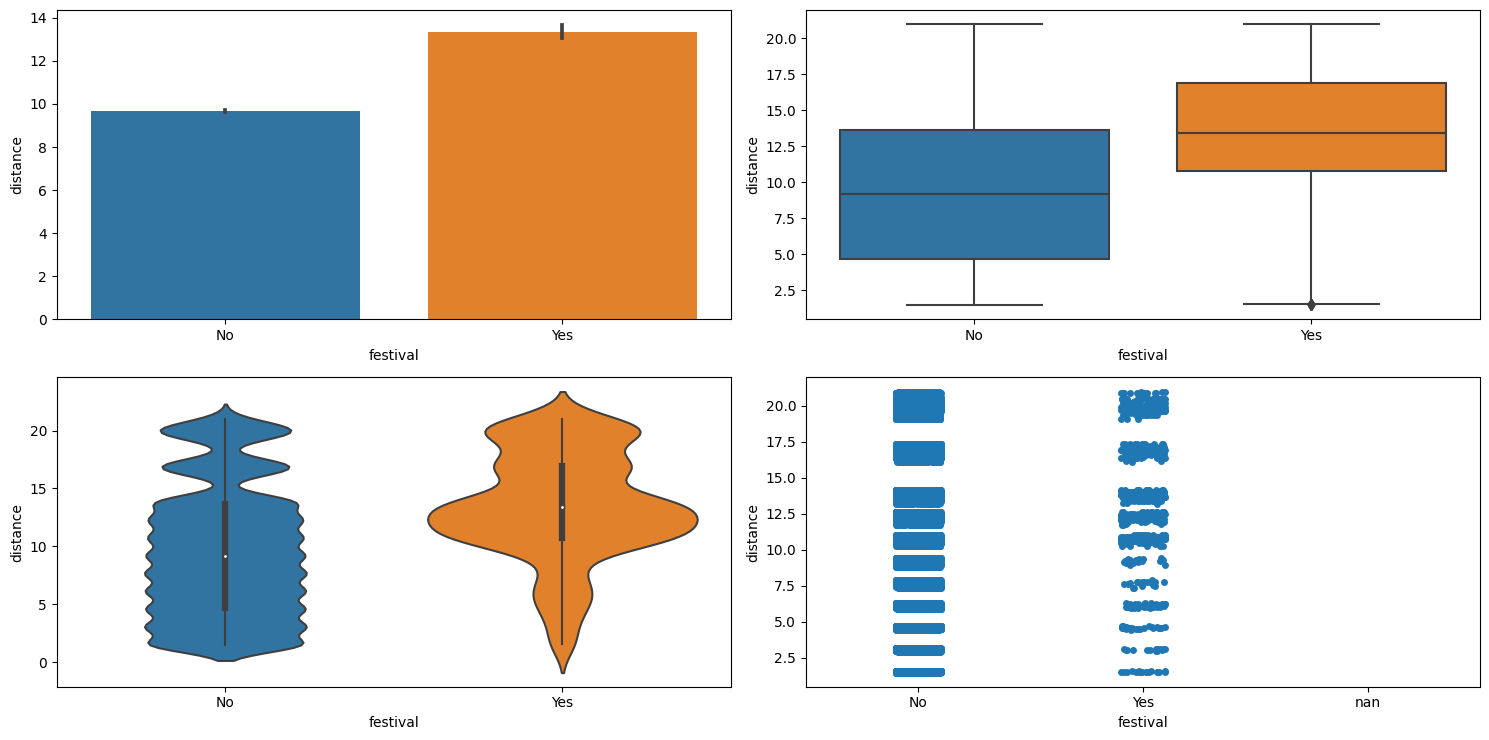

In [397]:
numerical_categorical_analysis(cleaned_data,'festival','distance')

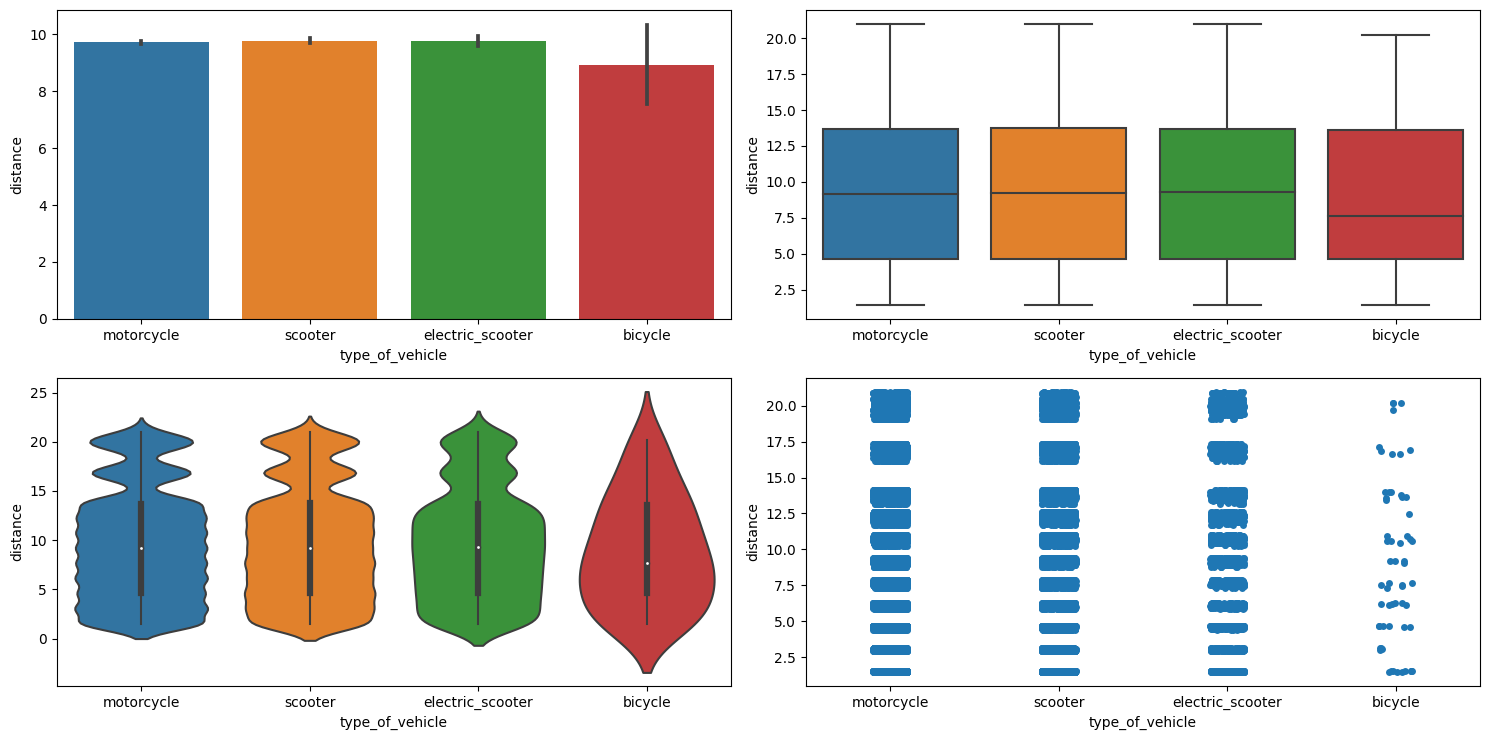

In [398]:
numerical_categorical_analysis(cleaned_data,'type_of_vehicle','distance')

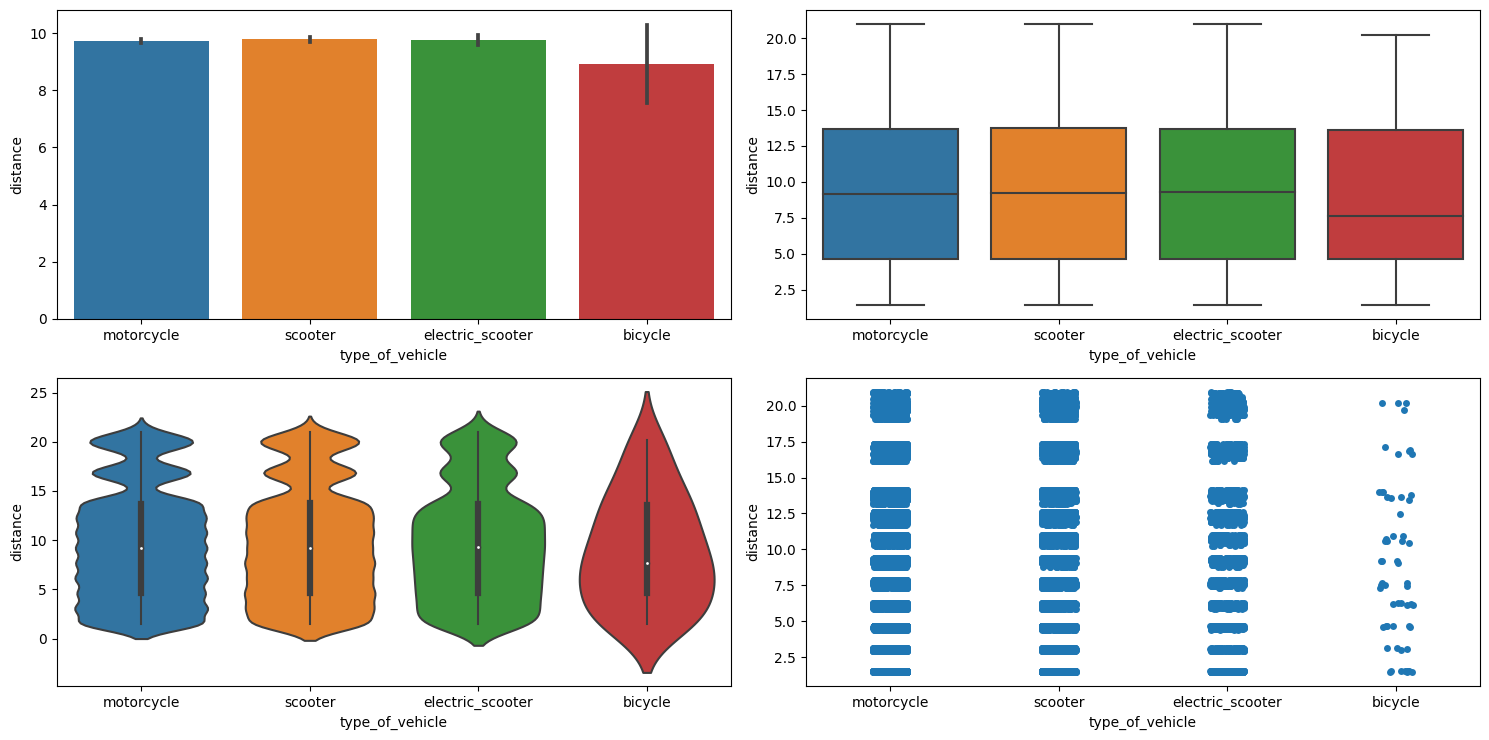

In [399]:
numerical_categorical_analysis(cleaned_data,'type_of_vehicle','distance')

In [400]:
pd.pivot_table(cleaned_data,index='type_of_vehicle',columns='type_of_order',values='distance',aggfunc='count')

type_of_order     Buffet  Drinks  Meal  Snack
type_of_vehicle                              
bicycle               13      14    21     12
electric_scooter     940     946   946    969
motorcycle          6593    6532  6655   6651
scooter             3724    3822  3828   3889

In [401]:
pd.pivot_table(cleaned_data,index= 'city',columns='type_of_order',values='distance',aggfunc='mean')

type_of_order     Buffet     Drinks       Meal      Snack
city                                                     
metropolitian   9.857387   9.912287   9.967597   9.987443
semi-urban     12.579556  13.272969  12.814926  13.234269
urban           9.180862   9.151667   8.853020   9.144775

In [402]:
cleaned_data.columns

Index(['rider_id', 'rider_age', 'rider_ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather_conditions', 'road_traffic_density',
       'vehicle_condition', 'type_of_order', 'type_of_vehicle',
       'multiple_deliveries', 'festival', 'city', 'time_taken', 'rider_city',
       'order_day', 'order_month', 'order_year', 'order_day_name',
       'order_weekend', 'pick_up_duration_min', 'distance', 'time_taken_pt'],
      dtype='object')

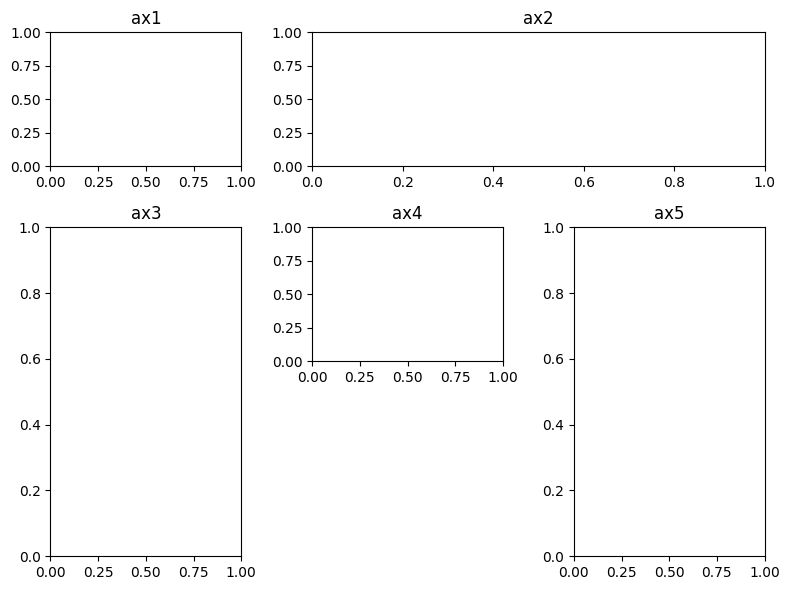

In [403]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Create a figure
fig = plt.figure(figsize=(8, 6))

# Define a 3x3 grid
gs = GridSpec(3, 3, figure=fig)

# Add subplots to specific grid cells
ax1 = fig.add_subplot(gs[0, 0])       # Top-left corner
ax2 = fig.add_subplot(gs[0, 1:])     # Top row, spanning columns 1 and 2
ax3 = fig.add_subplot(gs[1:, 0])     # Left column, spanning rows 1 and 2
ax4 = fig.add_subplot(gs[1, 1])      # Center
ax5 = fig.add_subplot(gs[1:, 2])     # Right column, spanning rows 1 and 2

# Add content to subplots
ax1.set_title("ax1")
ax2.set_title("ax2")
ax3.set_title("ax3")
ax4.set_title("ax4")
ax5.set_title("ax5")

# Display the plot
plt.tight_layout()
plt.show()
